Link to the dataset: https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market

The preprocessing portion follows this notebook: https://www.kaggle.com/code/scottpitcher/nyc-housing-project

Project video: [https://drive.google.com/file/d/1OT1zGl6UNIk5A8pKDCqJBH5Xn8dQPbIU/view?usp=drive_link](https://drive.google.com/file/d/1OT1zGl6UNIk5A8pKDCqJBH5Xn8dQPbIU/view?usp=drive_link)

# Importing and Cleaning Data

## Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,\
auc,recall_score,precision_score,roc_curve,accuracy_score,precision_recall_curve, r2_score, mean_squared_error
import time

In [ ]:
# Uncomment this to import dataset from local file system into Google Colab

from google.colab import files
files.upload()

files.download('NY-House-Dataset.csv')

import os
os.listdir()

Saving NY-House-Dataset.csv to NY-House-Dataset (2).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['.config',
 'catboost_info',
 'NY-House-Dataset (2).csv',
 'NY-House-Dataset (1).csv',
 'NY-House-Dataset.csv',
 'sample_data']

## Importing Data

In [ ]:
housing = pd.read_csv("NY-House-Dataset.csv")
housing.columns = housing.columns.str.lower() #lower the casing of columns for ease of use
housing.columns

Index(['brokertitle', 'type', 'price', 'beds', 'bath', 'propertysqft',
       'address', 'state', 'main_address', 'administrative_area_level_2',
       'locality', 'sublocality', 'street_name', 'long_name',
       'formatted_address', 'latitude', 'longitude'],
      dtype='object')

## Data Inspection and Exploration

In [ ]:
housing.head()

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
#Checking for null values
print(housing.info())
housing['sublocality'] = housing['sublocality'].astype('category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brokertitle                  4801 non-null   object 
 1   type                         4801 non-null   object 
 2   price                        4801 non-null   int64  
 3   beds                         4801 non-null   int64  
 4   bath                         4801 non-null   float64
 5   propertysqft                 4801 non-null   float64
 6   address                      4801 non-null   object 
 7   state                        4801 non-null   object 
 8   main_address                 4801 non-null   object 
 9   administrative_area_level_2  4801 non-null   object 
 10  locality                     4801 non-null   object 
 11  sublocality                  4801 non-null   object 
 12  street_name                  4801 non-null   object 
 13  long_name         

## Looking into Outliers

In [ ]:
housing.sublocality.value_counts()

sublocality
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      480
Brooklyn             464
Bronx County         307
New York County      286
The Bronx            184
Staten Island         59
Manhattan             21
Flushing               4
Riverdale              4
Coney Island           3
Jackson Heights        1
Fort Hamilton          1
East Bronx             1
Dumbo                  1
Rego Park              1
Brooklyn Heights       1
Snyder Avenue          1
Name: count, dtype: int64

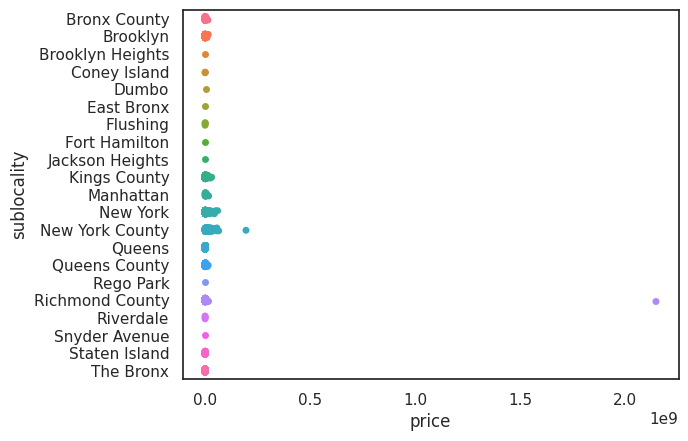

In [ ]:
#Checking for outliers
sns.stripplot(data = housing,
             x= "price",
             y = "sublocality",
             hue = 'sublocality',
             legend = False)
plt.show()

Noticing a major outlier in Richmond County, we will investigate it.

In [ ]:
housing[housing["price"] ==housing.loc[housing["sublocality"] == "Richmond County", "price"].max()]

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.0,10000.0,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,New York,Richmond County,Staten Island,Amboy Road,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.518484,-74.224418


This value skews the data too much, and seems to be an above average sale. We will remove this, along with any other extreme outliers now.

In [ ]:
sublocality_counts = housing['sublocality'].value_counts()
multiples = sublocality_counts[sublocality_counts > 1].index.tolist()
sublocalities_multiple = housing[housing["sublocality"].isin(multiples)]
print(sublocalities_multiple.sublocality.value_counts())

sublocality
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      480
Brooklyn             464
Bronx County         307
New York County      286
The Bronx            184
Staten Island         59
Manhattan             21
Flushing               4
Riverdale              4
Coney Island           3
Jackson Heights        0
Fort Hamilton          0
East Bronx             0
Dumbo                  0
Rego Park              0
Brooklyn Heights       0
Snyder Avenue          0
Name: count, dtype: int64


In [ ]:
sublocalities_multiple.loc[:,"sublocality"]=sublocalities_multiple.loc[:,"sublocality"].cat.remove_unused_categories()
sublocalities_multiple.sublocality.value_counts()

sublocality
New York           1016
Kings County        727
Queens County       684
Queens              555
Richmond County     480
Brooklyn            464
Bronx County        307
New York County     286
The Bronx           184
Staten Island        59
Manhattan            21
Flushing              4
Riverdale             4
Coney Island          3
Name: count, dtype: int64

<Figure size 1400x800 with 0 Axes>

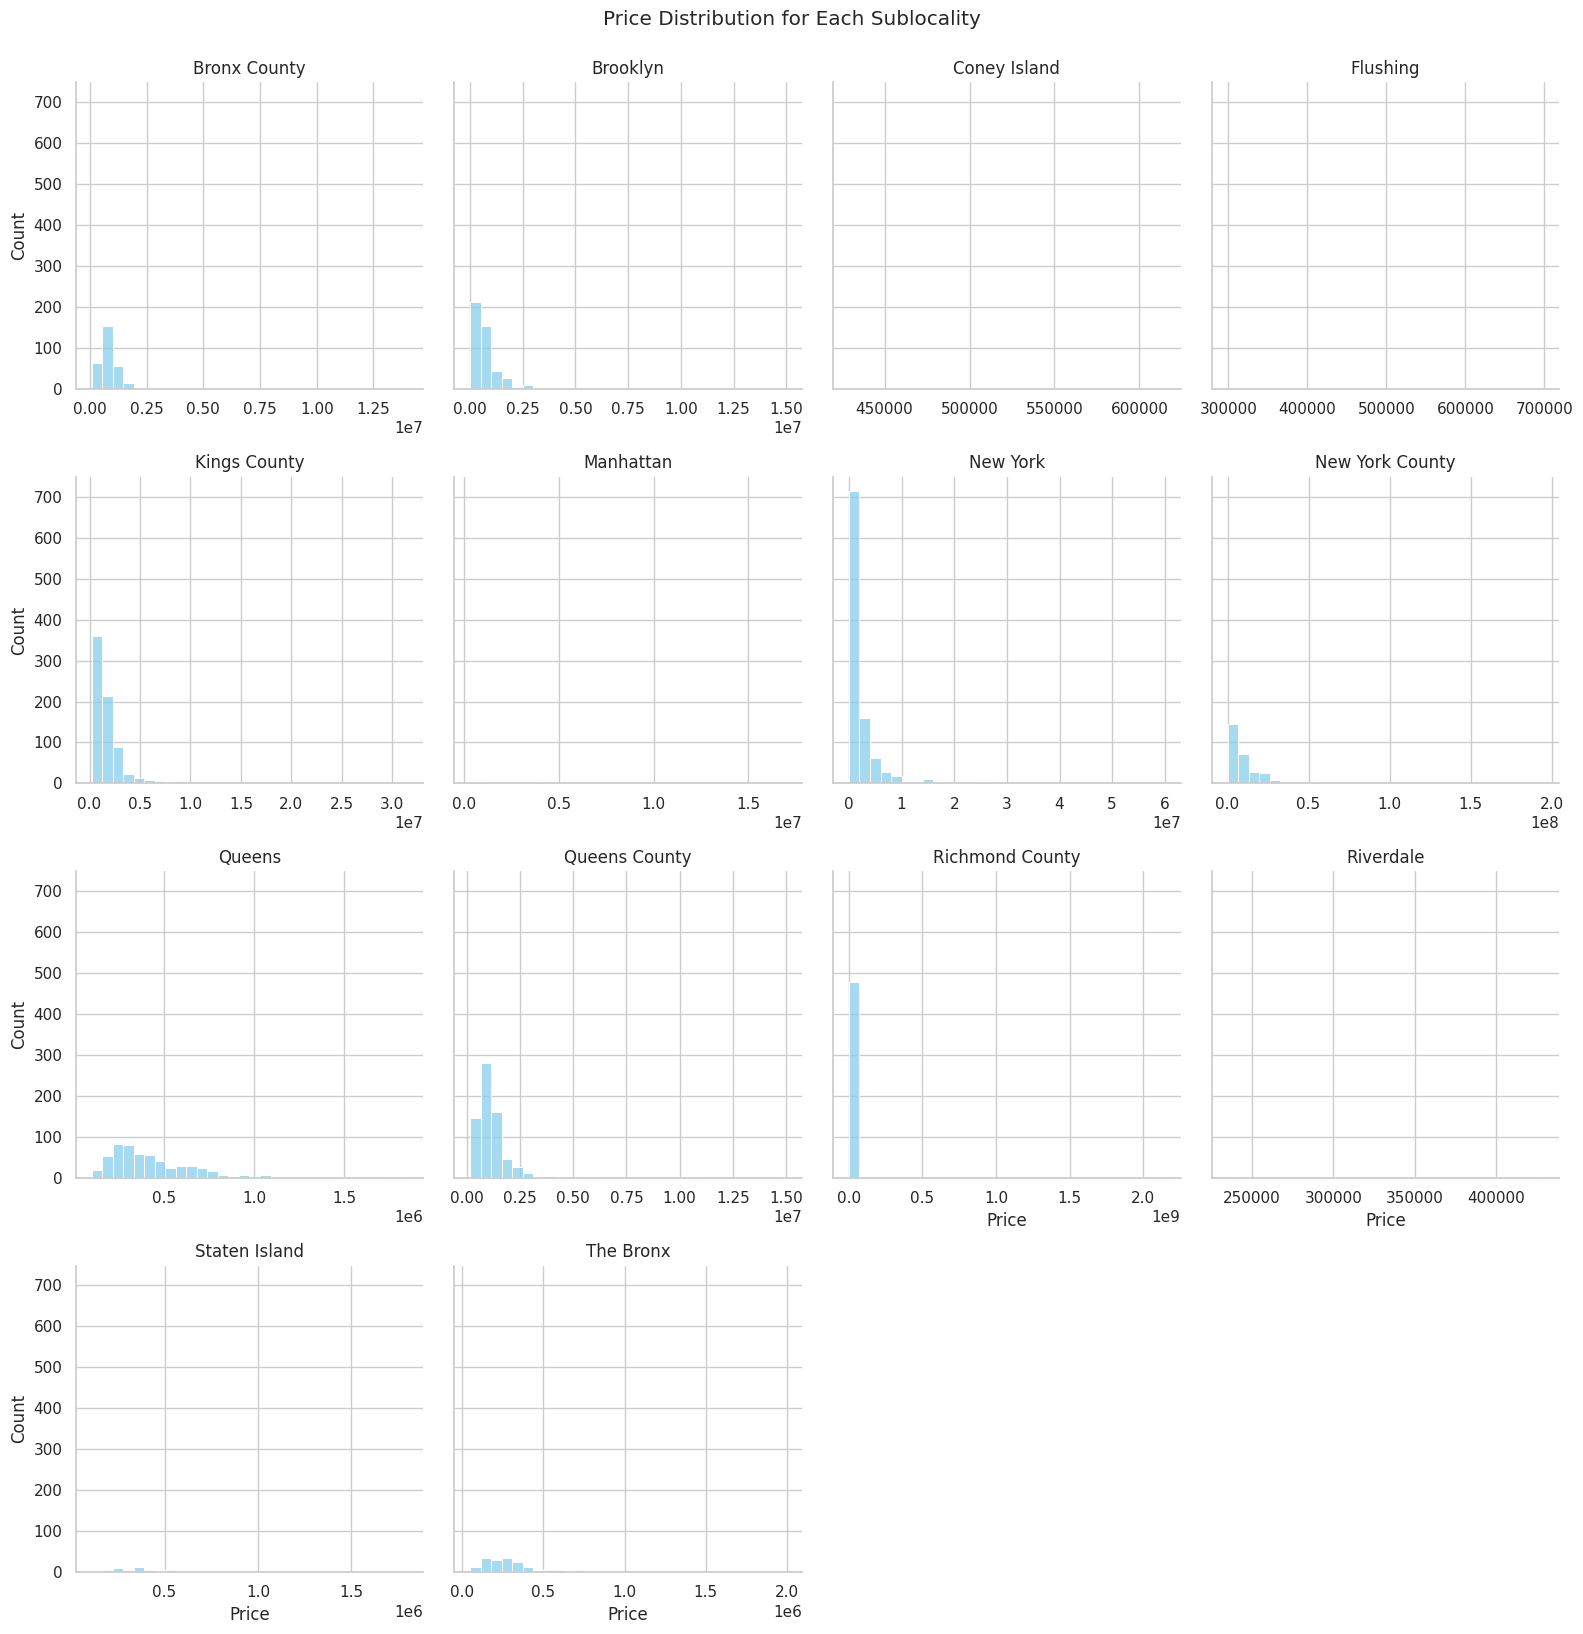

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

# Create a FacetGrid with subplots for each sublocality
g = sns.FacetGrid(sublocalities_multiple, col="sublocality", col_wrap=4, height=4, sharex=False)

g.map(sns.histplot, "price", kde=False, bins=30, color='skyblue')

g.set_axis_labels("Price", "Count")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Price Distribution for Each Sublocality", y=1.02)

plt.show()

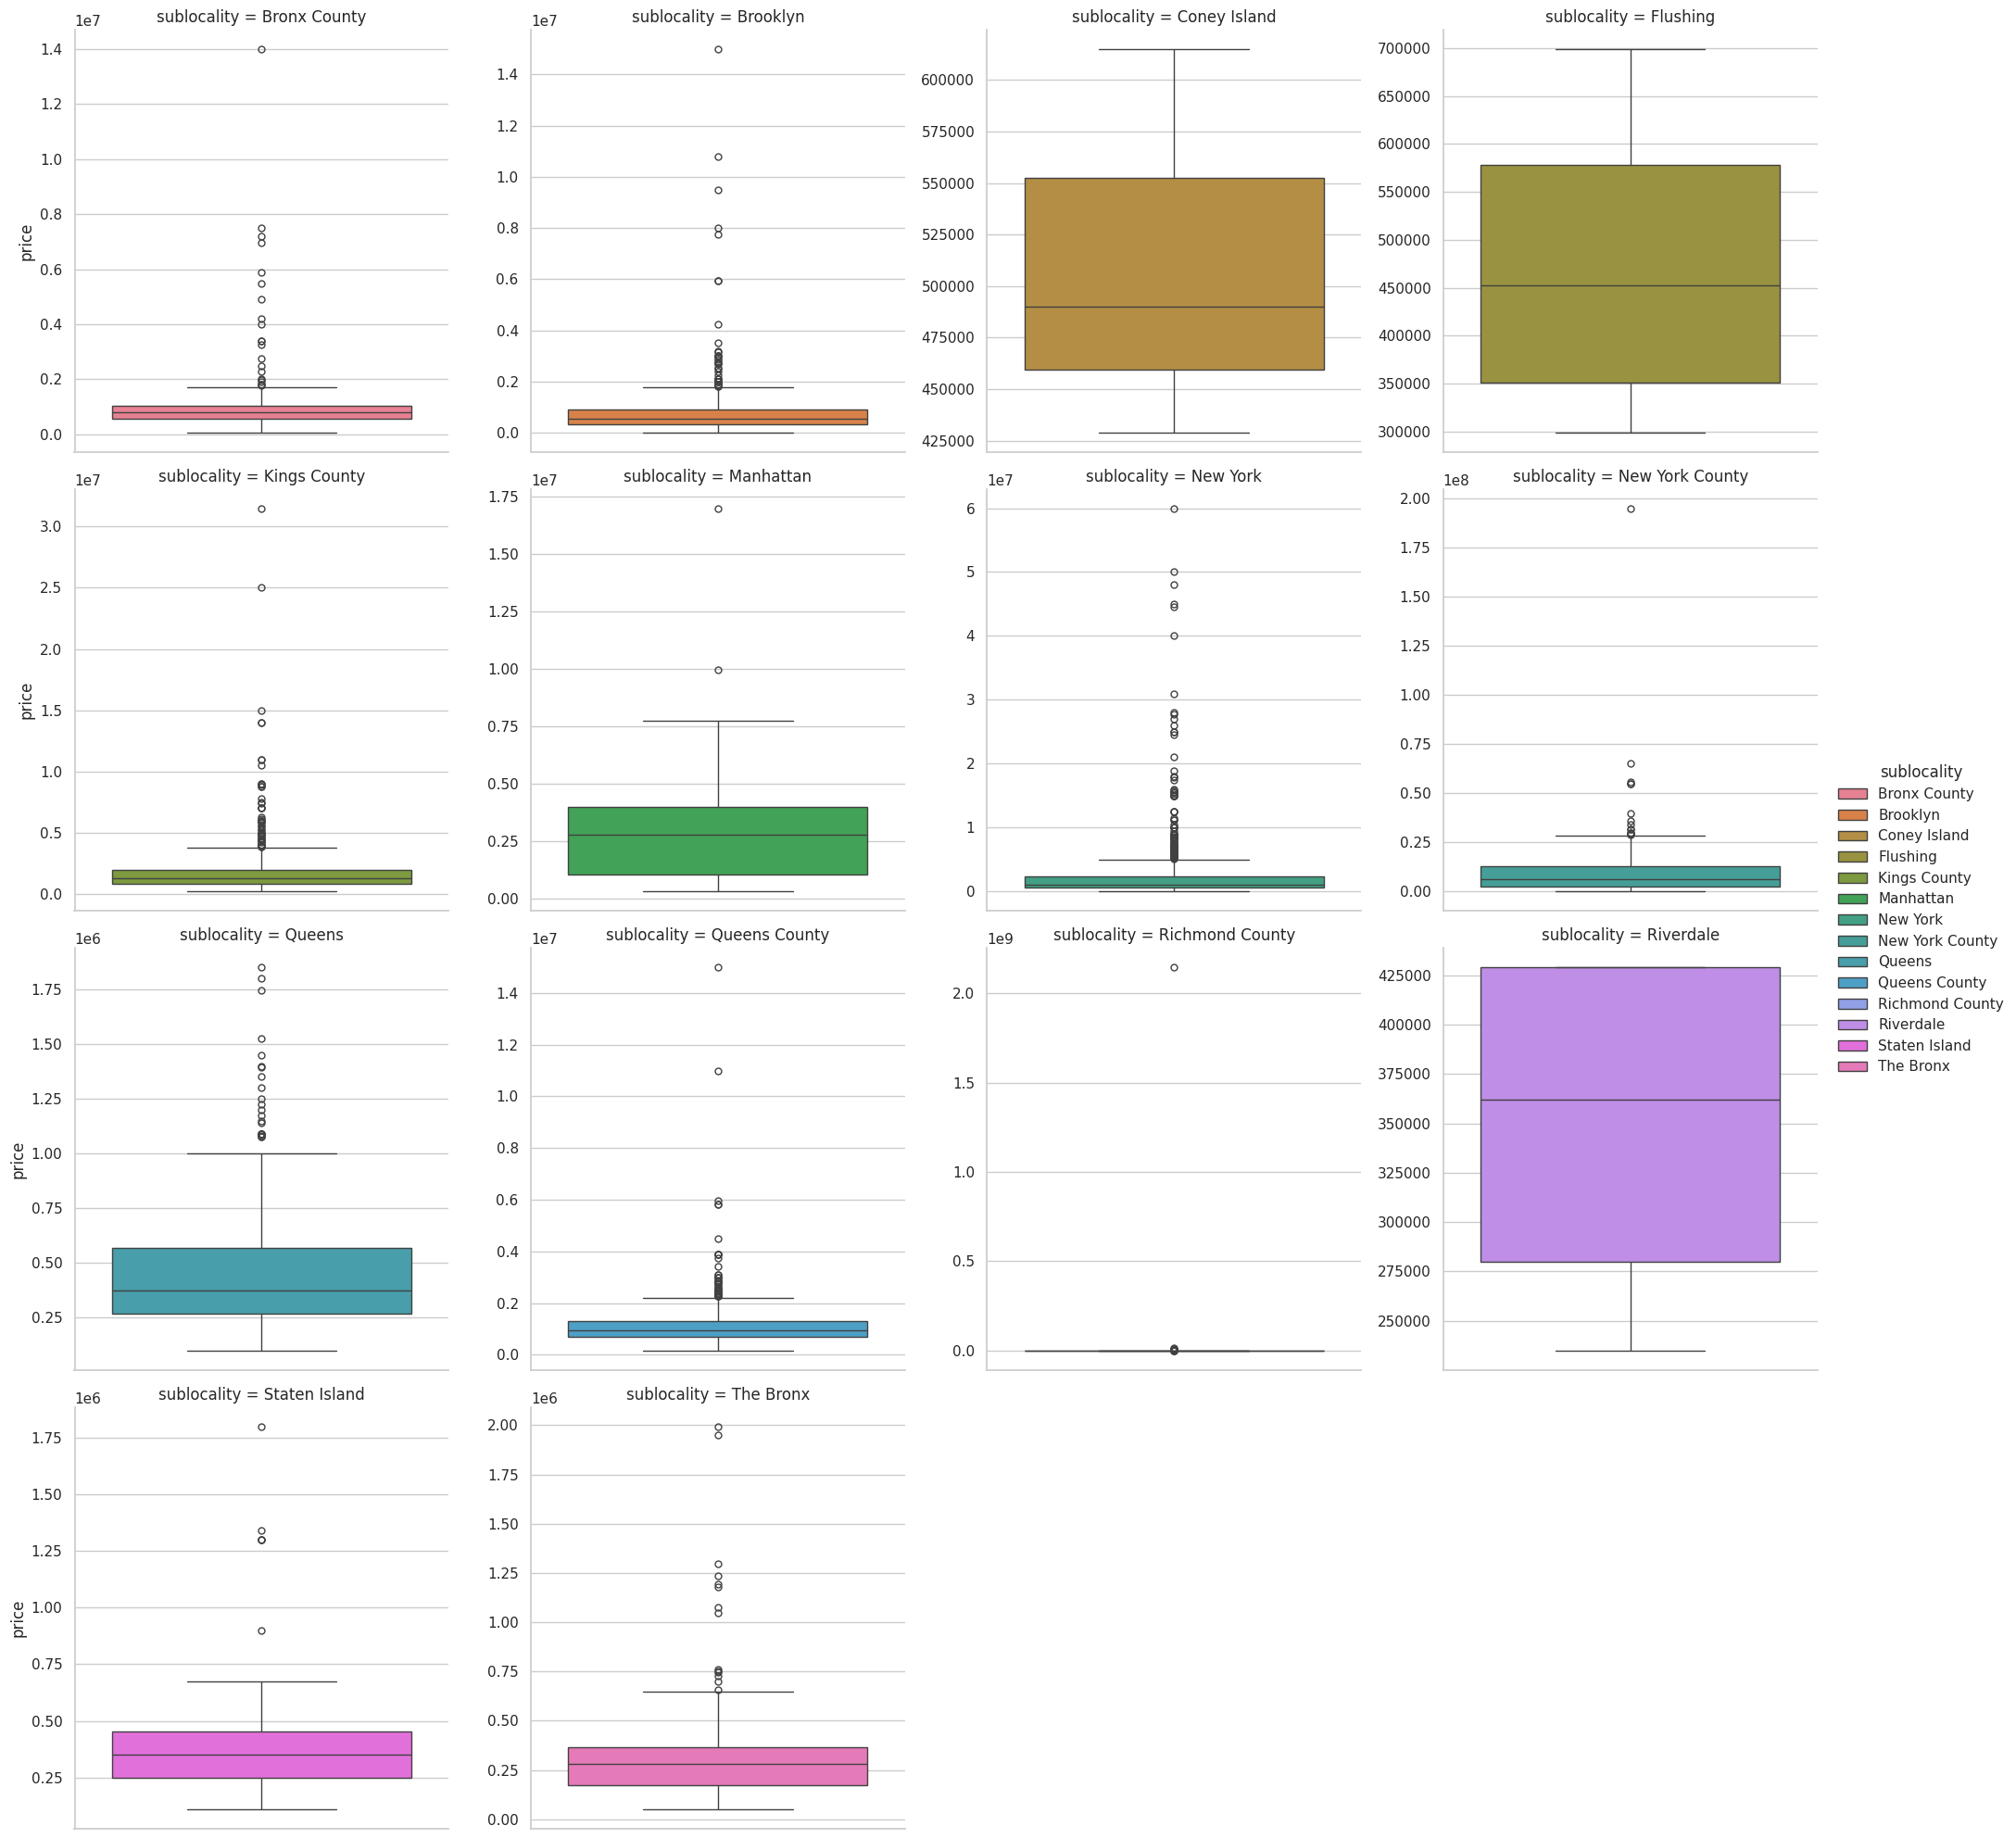

In [ ]:
sns.catplot(data = sublocalities_multiple,
            y = "price",
            kind = "box",
            col = 'sublocality',
            hue = 'sublocality',
           col_wrap =4,
           sharey=False)

plt.show()

We will remove outliers, but only extreme outliers as to not affect the data too much.

In [ ]:
def find_outliers(group):
    q1 = group['price'].quantile(0.25)
    q3 = group['price'].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    return group[((group['price'] > upper_limit) | (group['price'] < lower_limit))]

outliers = housing.groupby('sublocality').apply(find_outliers)['address']
print(outliers)

housing_clean = housing[~housing["address"].isin(outliers)]
housing_clean

sublocality       
Bronx County  417                    2090 Arthur Ave
              513                 5041 Goodridge Ave
              823                    3650 Bronx Blvd
              1063                5020 Grosvenor Ave
              1068                6140 Delafield Ave
                                   ...              
The Bronx     3432     3777 Independence Ave Apt 16M
              3491               4 Marisa Ct Unit 4A
              3661       750 Kappock St Unit 611-614
              3899    4555 Henry Hudson Pkwy Apt 903
              4407          2500 Johnson Ave Apt 14H
Name: address, Length: 357, dtype: object


,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
5,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


Now that we've removed outliers, we will recheck the spread of the data.

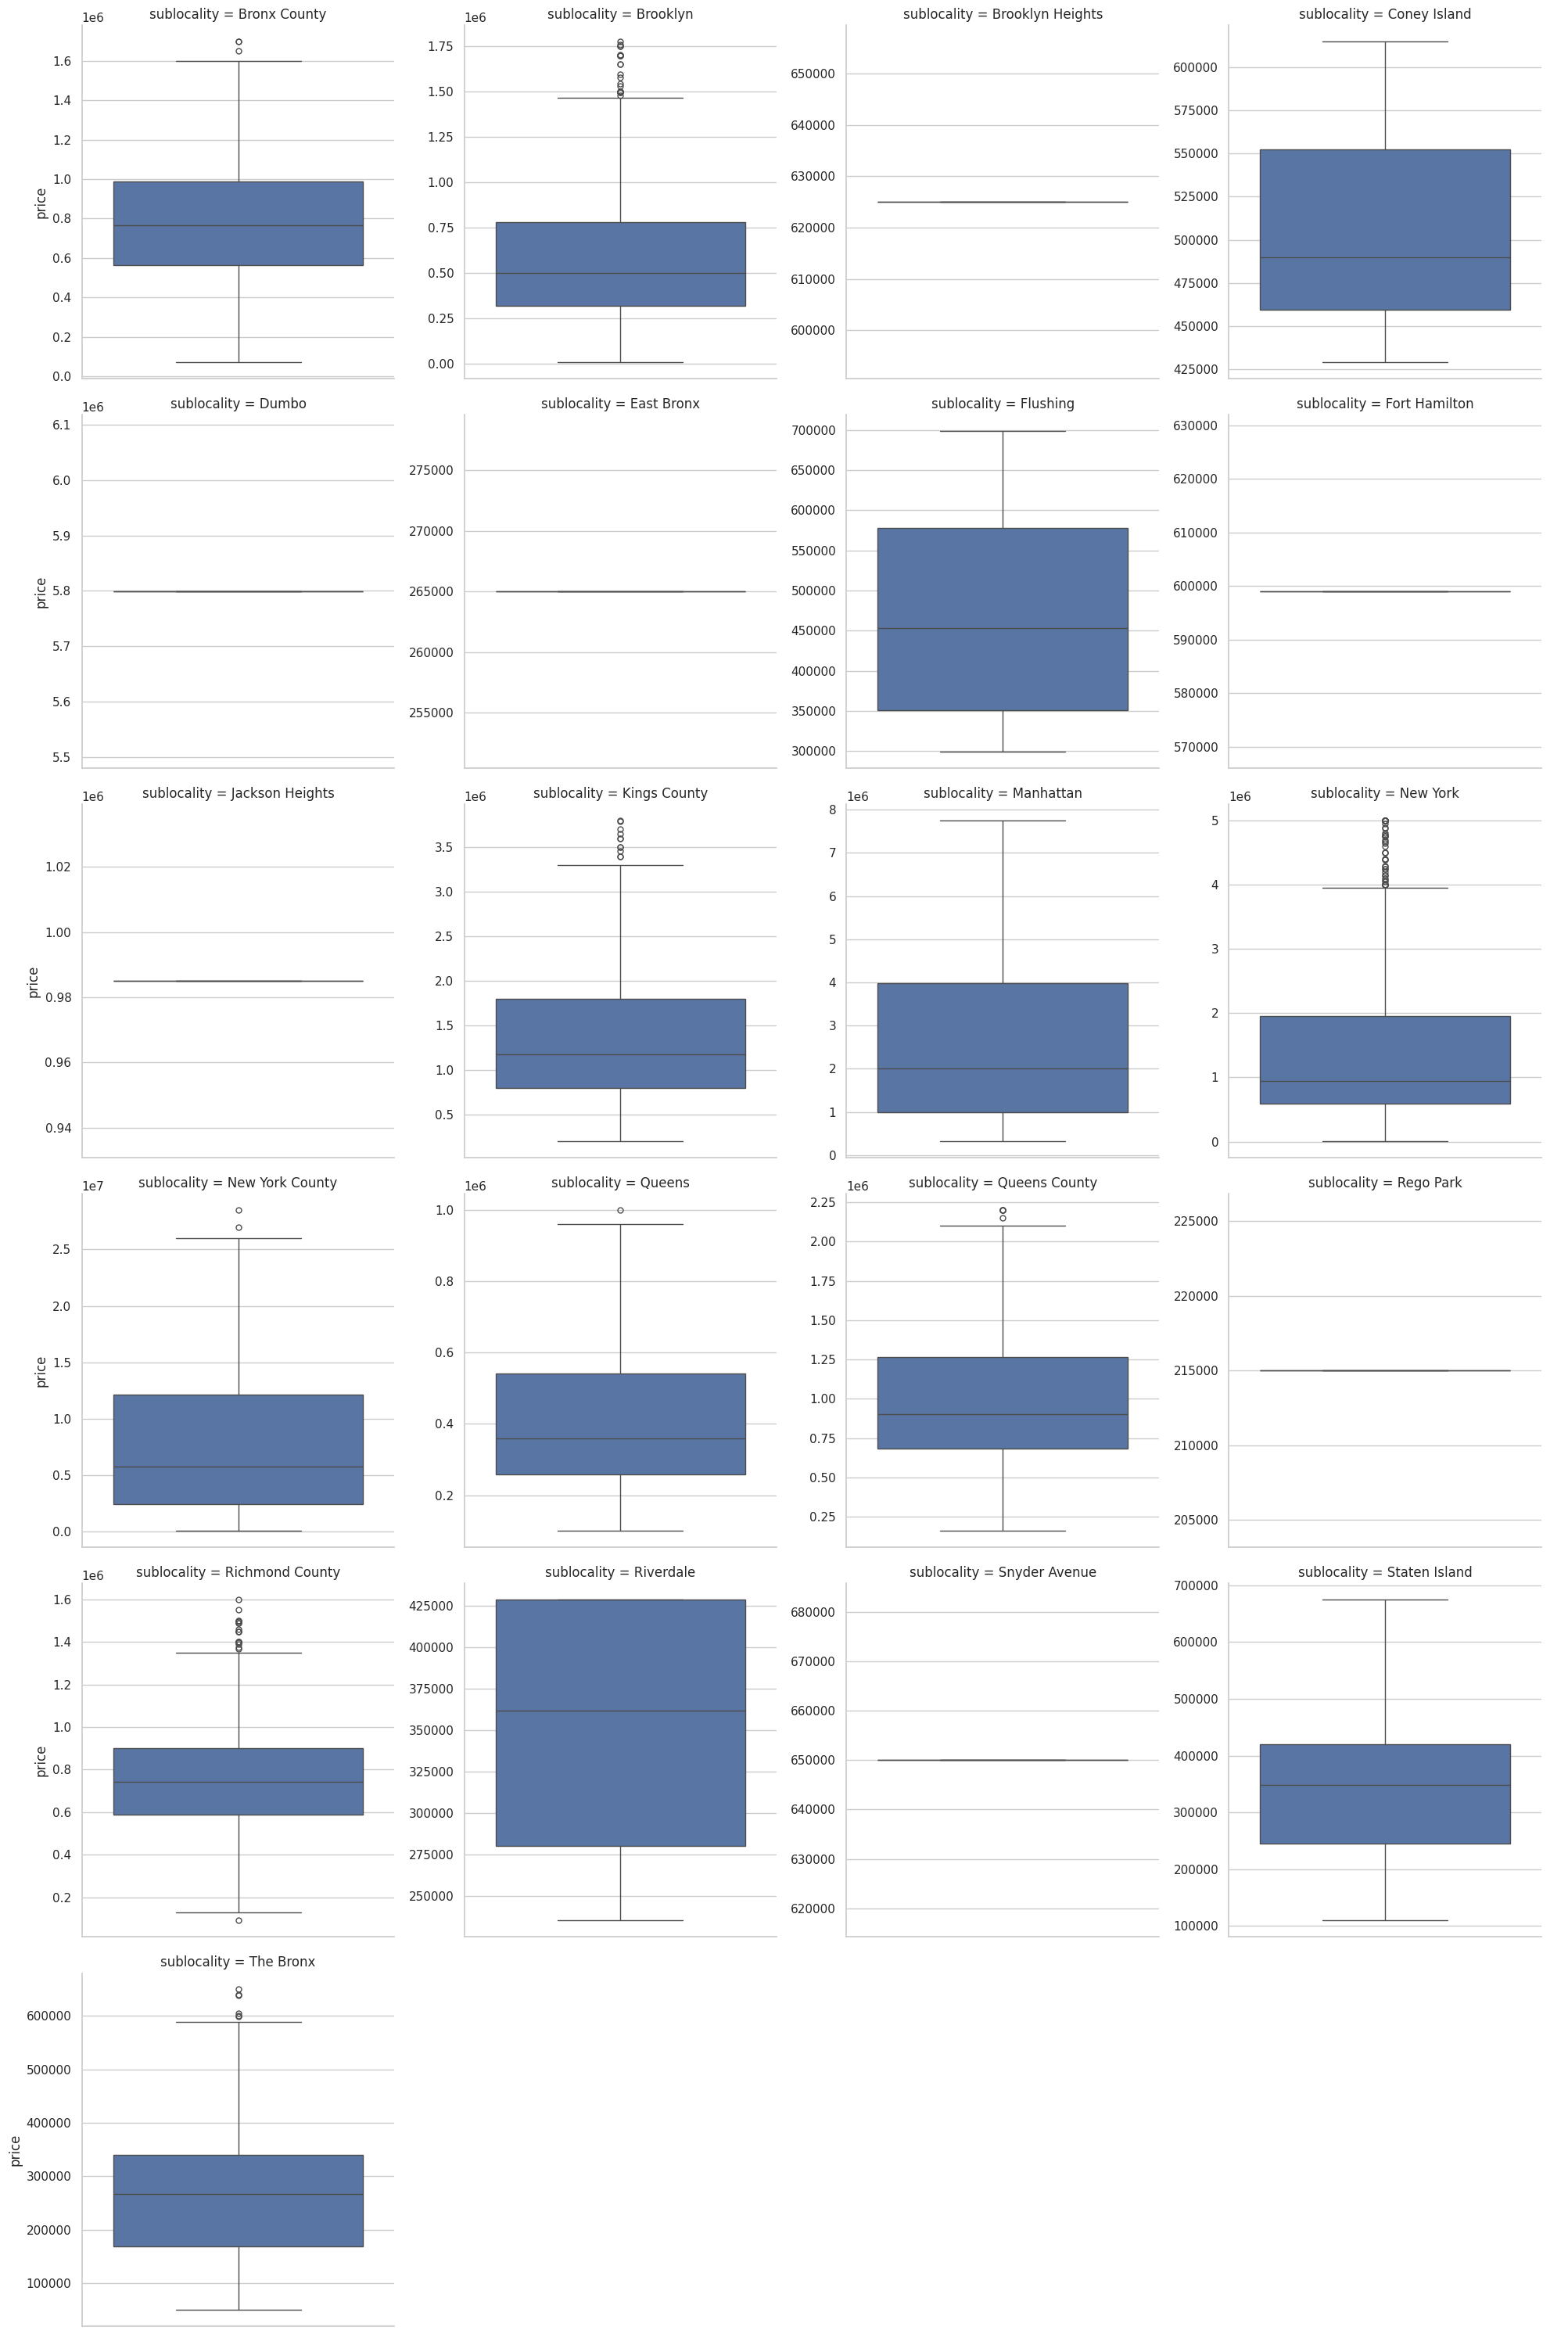

In [ ]:
sns.catplot(data = housing_clean,
            y = "price",
            kind = "box",
            col = 'sublocality',
           col_wrap =4,
           sharey=False)

plt.show()

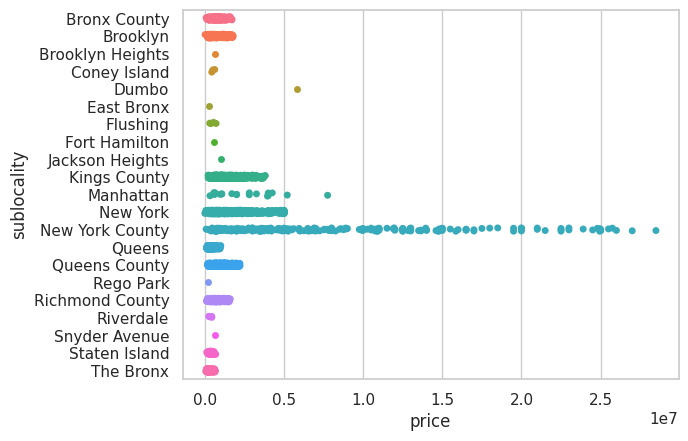

In [ ]:
sns.stripplot(data = housing_clean,
             x= "price",
             y = "sublocality",
             hue = 'sublocality',
             legend = False)

plt.show()

<Figure size 1400x800 with 0 Axes>

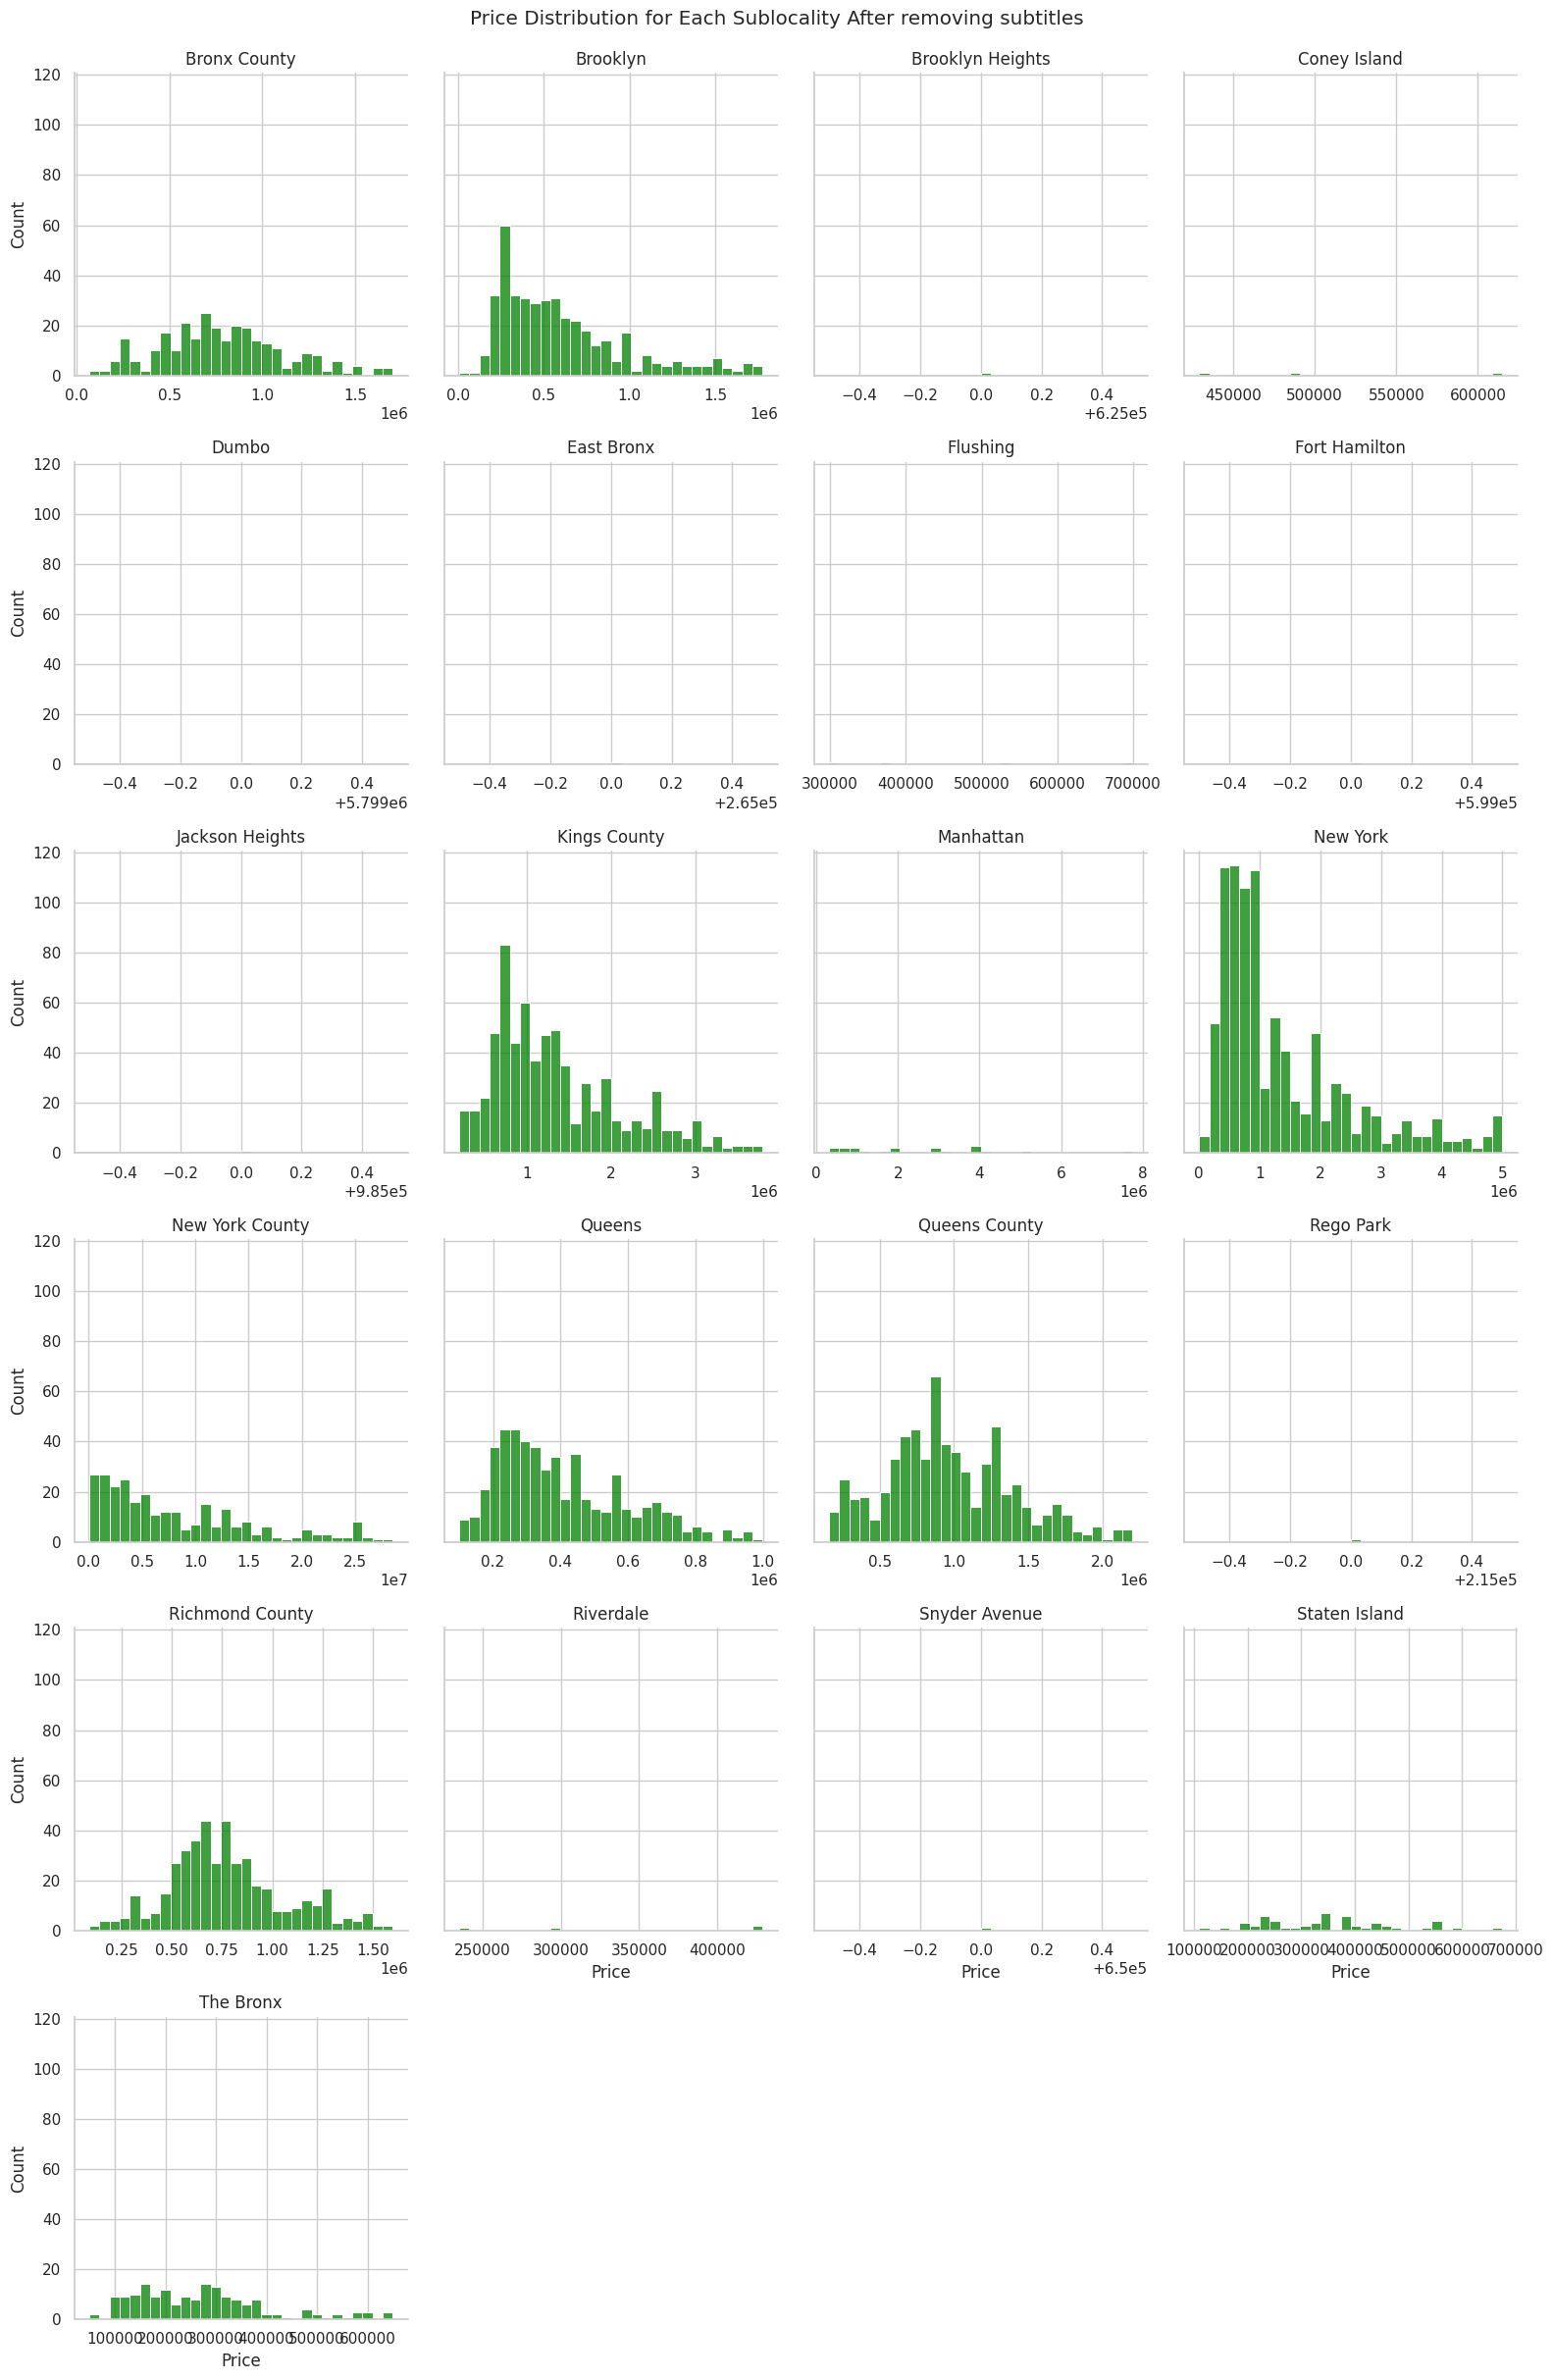

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

# Create a FacetGrid with subplots for each sublocality
g = sns.FacetGrid(housing_clean, col="sublocality", col_wrap=4, height=4, sharex=False)

g.map(sns.histplot, "price", kde=False, bins=30, color='green')

g.set_axis_labels("Price", "Count")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Price Distribution for Each Sublocality After removing subtitles", y = 1.01)

plt.show()

The variability in the prices by sublocality seem closer to normal now, we will proceed with these addresses.

## Checking out duplicated addresses

In [ ]:
print(len(housing_clean))
print(housing_clean.address.nunique())

4444
4240


Above we recieve 4444 as the amount of rows in the cleaned dataframe, but 4240 unique addresses. Resulting in 204 duplicated addresses.

In [ ]:
#Subsetting for duplicates based on address only
add_duplicates = housing_clean[housing_clean.address.duplicated()].address
add_duplicates
housing_dupl_add = housing_clean[housing_clean["address"].isin(add_duplicates)]
print(len(housing_dupl_add))

406


In [ ]:
#Take the length of the unique addresses within the duplicates
len(housing_dupl_add.address.unique())


202

We recieve 406 addresses in the duplicated dataframe, with 202 unique values. So that should be mean that 200 are duplicated once (400 total rows, 2 per address), and two are duplicated twice (6 total rows, 3 per address). We will take the value counts of the addresses to confirm.

In [ ]:
housing_dupl_add.address.value_counts()

address
2619 Shore Pkwy                        3
856 Washington Ave Apt 6C              3
200 E 94th St Apt 414                  2
5614 Netherland Ave Apt 4B             2
61-20 Grand Central Pkwy Unit B1210    2
                                      ..
79-28 68th Ave                         2
425 W 24th St Apt 1E                   2
66-36 Yellowstone Blvd Unit 23C        2
58 Roanoke St                          2
242 E 15th St Apt 1                    2
Name: count, Length: 202, dtype: int64

While we want to remove duplicated rows, we need to make sure that the duplicated addresses are full duplicates.

In [ ]:
full_duplicates=housing_clean[housing_clean.duplicated(keep=False)]
full_duplicates

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
80,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
81,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
113,Brokered by Sowae Corp,House for sale,400000,4,2.000000,1980.000000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.665357,-73.877087
114,Brokered by Sowae Corp,Multi-family home for sale,346000,5,2.000000,2184.207862,103-12 104th St,"Ozone Park, NY 11417","103-12 104th StOzone Park, NY 11417",United States,New York,Queens County,Queens,104th Street,"103-12 104th St, Jamaica, NY 11417, USA",40.683789,-73.838104
115,Brokered by Sowae Corp,House for sale,400000,4,2.000000,1980.000000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.665357,-73.877087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714
4770,Brokered by Sotheby's International Realty - E...,Condo for sale,2600000,3,2.000000,1729.000000,242 E 15th St Apt 1,"New York, NY 10003","242 E 15th St Apt 1New York, NY 10003",New York,New York County,New York,Manhattan,242,"242 E 15th St APT 1, New York, NY 10003, USA",40.733031,-73.985037
4775,Brokered by EXIT REALTY PREMIER,House for sale,749000,3,2.373861,2002.000000,631 Essex St,"Brooklyn, NY 11208","631 Essex StBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Essex Street,"631 Essex St, Brooklyn, NY 11208, USA",40.668173,-73.880027
4780,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714


Taking the addresses of both, and finding the difference

In [ ]:
address_list = set(housing_dupl_add.address.unique().tolist())
full_list = set(full_duplicates.address.unique().tolist())

not_full_dupl = address_list.symmetric_difference(full_list)

not_full_dupl_df = housing_clean[housing_clean["address"].isin(not_full_dupl)]
not_full_dupl_df

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
3914,Brokered by Ny Superior Realty,Multi-family home for sale,1548000,9,4.000000,4539.000000,104-14 37th Ave,"Corona, NY 11368","104-14 37th AveCorona, NY 11368",United States,New York,Queens County,Queens,37th Avenue,"104-14 37th Ave, Flushing, NY 11368, USA",40.753419,-73.862881
3989,Brokered by Ny Superior Realty,House for sale,1548000,9,4.000000,2184.207862,104-14 37th Ave,"Corona, NY 11368","104-14 37th AveCorona, NY 11368",United States,New York,Queens County,Queens,37th Avenue,"104-14 37th Ave, Flushing, NY 11368, USA",40.753419,-73.862881
4204,"Brokered by Nest Seekers International, Westside",House for sale,3200000,6,5.000000,5000.000000,18 W 127th St,"New York, NY 10027","18 W 127th StNew York, NY 10027",United States,New York,New York County,New York,West 127th Street,"18 W 127th St, New York, NY 10027, USA",40.807940,-73.942354
4759,Brokered by R New York,Multi-family home for sale,2500000,3,2.373861,4100.000000,18 W 127th St,"New York, NY 10027","18 W 127th StNew York, NY 10027",United States,New York,New York County,New York,West 127th Street,"18 W 127th St, New York, NY 10027, USA",40.807940,-73.942354


We have two addresses that have duplicated addressed, but mismatched information. It seems as though the second entry for each property is an error as the values are unusual. We will keep the first entry for each.

In [ ]:
print(len(housing_clean)) #Should be 4444
clean_df = housing_clean.drop_duplicates(subset = ["address"], keep = "first") #Since we are keeping the first instance, we will get the correct non-fully duplicated rows
print(len(clean_df)) #should be  4240 (losing 200 rows from 1x duplicates, and 4 rows from 2x duplicates (204 deleted))
print(clean_df.address.value_counts()[clean_df.address.value_counts()>1]) #making sure there are no more duplicated rows

4444
4240
Series([], Name: count, dtype: int64)


In [ ]:
#Now check that the correct non-full duplicates were kept
not_full_list = not_full_dupl_df.address.unique().tolist()
clean_df[clean_df.address.isin(not_full_list)]
#it kept the correct rows. We now have our cleaned dataframe

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
3914,Brokered by Ny Superior Realty,Multi-family home for sale,1548000,9,4.0,4539.0,104-14 37th Ave,"Corona, NY 11368","104-14 37th AveCorona, NY 11368",United States,New York,Queens County,Queens,37th Avenue,"104-14 37th Ave, Flushing, NY 11368, USA",40.753419,-73.862881
4204,"Brokered by Nest Seekers International, Westside",House for sale,3200000,6,5.0,5000.0,18 W 127th St,"New York, NY 10027","18 W 127th StNew York, NY 10027",United States,New York,New York County,New York,West 127th Street,"18 W 127th St, New York, NY 10027, USA",40.807940,-73.942354


## Exploring Data for Analysis

In [ ]:
clean_df.columns

Index(['brokertitle', 'type', 'price', 'beds', 'bath', 'propertysqft',
       'address', 'state', 'main_address', 'administrative_area_level_2',
       'locality', 'sublocality', 'street_name', 'long_name',
       'formatted_address', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
selected_features = ['brokertitle','address','type', 'beds', 'bath', 'propertysqft', 'sublocality', 'price', 'latitude','longitude']
df = clean_df[selected_features]

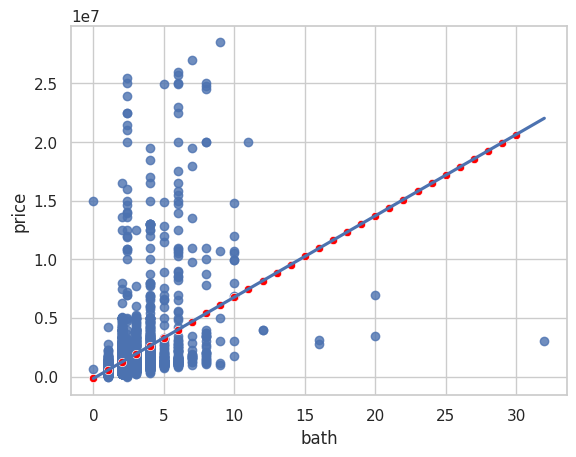

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     960.5
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          2.89e-190
Time:                        00:06:40   Log-Likelihood:                -68045.
No. Observations:                4240   AIC:                         1.361e+05
Df Residuals:                    4238   BIC:                         1.361e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.58e+05   6.05e+04     -2.610      0.009   -2.77e+05   -3.93e+04
bath        6.935e+05   2.24e+04     30.992      0.000     6.5e+05    7.37e+05
==============================================================================
Omnibus:                     4662.647   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           390404.987
Skew:                           5.616   Prob(JB):                         0.00
Kurtosis:                      48.648   Cond. No.                         5.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
bath_v_price = ols("price~bath", data = df).fit()
baths = pd.DataFrame({'bath': np.arange(0, 31)})
bath_pred = bath_v_price.predict(baths)

pred_data = baths.assign(price= bath_pred)

fig = plt.figure()
sns.regplot(data = df,
           x="bath",
           y="price",
           ci=None)
sns.scatterplot(data = pred_data,
           x="bath",
           y="price",
           color = 'red')

plt.show()

bath_v_price.summary()

In [ ]:
#parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
#searcher = GridSearchCV(model, parameters)

#print("Best CV params", searcher.best_params_)
#print("Best CV accuracy", searcher.best_score_)


In [ ]:
fig = px.scatter_geo(df, lat='latitude', lon='longitude', color='price',
                     hover_name='address', #size='mag',
                     title='Real Estate Prices in NYC')
fig.update_geos(fitbounds="locations")
fig.show()

# Modelling the Data

In [ ]:
model_features = ['brokertitle','type', 'beds', 'bath', 'propertysqft', 'sublocality', 'price']
df_model = df[model_features]
df_model

,brokertitle,type,beds,bath,propertysqft,sublocality,price
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,2,2.0,1400.000000,Manhattan,315000
2,Brokered by Sowae Corp,House for sale,4,2.0,2015.000000,Richmond County,260000
3,Brokered by COMPASS,Condo for sale,3,1.0,445.000000,New York County,69000
5,Brokered by Sowae Corp,House for sale,5,2.0,4004.000000,Kings County,690000
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,2,2.0,2184.207862,New York,899500
...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,1,1.0,2184.207862,New York,599000
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,1,1.0,2184.207862,Queens County,245000
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1,1.0,2184.207862,New York County,1275000
4799,Brokered by E Realty International Corp,Condo for sale,2,1.0,655.000000,Queens,598125


In [ ]:
#Checking the data types
df_model.dtypes

brokertitle       object
type              object
beds               int64
bath             float64
propertysqft     float64
sublocality     category
price              int64
dtype: object

In [ ]:
#Fixing data types
df_model.loc[:,['brokertitle', 'type','sublocality']] = df_model.loc[:,['brokertitle', 'type','sublocality']].astype("category")
df_model.dtypes



brokertitle       object
type              object
beds               int64
bath             float64
propertysqft     float64
sublocality     category
price              int64
dtype: object

In [ ]:
X= df[["beds","bath","propertysqft","sublocality"]]
print(X)


      beds  bath  propertysqft      sublocality
0        2   2.0   1400.000000        Manhattan
2        4   2.0   2015.000000  Richmond County
3        3   1.0    445.000000  New York County
5        5   2.0   4004.000000     Kings County
6        2   2.0   2184.207862         New York
...    ...   ...           ...              ...
4796     1   1.0   2184.207862         New York
4797     1   1.0   2184.207862    Queens County
4798     1   1.0   2184.207862  New York County
4799     2   1.0    655.000000           Queens
4800     1   1.0    750.000000         Brooklyn

[4240 rows x 4 columns]


In [ ]:
y = df["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [ ]:
n_estimators = np.arange(5,21,1)

estimator_r2 = {}
for est in n_estimators:
    xg_cl = xgb.XGBRegressor(objective = "reg:squarederror",
                             n_estimators=est,
                             seed = 123,
                             enable_categorical=True)
    xg_cl.fit(X_train,y_train)
    pred_price = xg_cl.predict(X_test)
    mse = mean_squared_error(y_test, pred_price)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, pred_price)
    estimator_r2[est] = [mse, rmse, r_squared]

estimator_df = pd.DataFrame.from_dict(estimator_r2, orient='index', columns=["MSE", "RMSE", "R-squared"])
estimator_df




,MSE,RMSE,R-squared
5,2.482520e+12,1.575601e+06,0.624633
6,2.308723e+12,1.519448e+06,0.650912
7,2.267028e+12,1.505665e+06,0.657216
8,2.214678e+12,1.488179e+06,0.665132
9,2.183816e+12,1.477774e+06,0.669798
10,2.191712e+12,1.480443e+06,0.668604
11,2.156272e+12,1.468425e+06,0.673963
12,2.162329e+12,1.470486e+06,0.673047
13,2.142951e+12,1.463882e+06,0.675977
14,2.151354e+12,1.466750e+06,0.674707


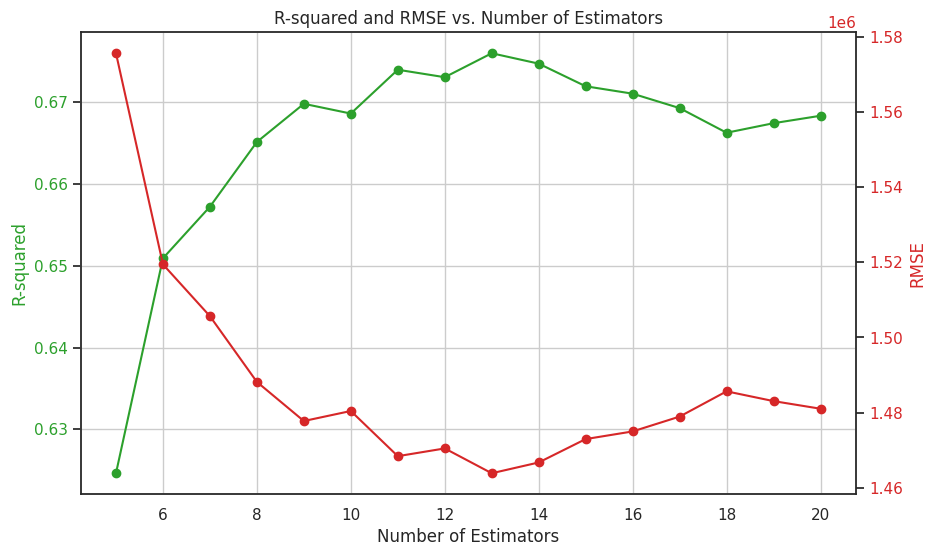

In [ ]:
fix, ax1 = plt.subplots(figsize = (10,6))
sns.set(style='white')

ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('R-squared', color="tab:green")
ax1.plot(estimator_df.index, estimator_df['R-squared'], color='tab:green')
ax1.scatter(estimator_df.index, estimator_df['R-squared'], color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Secondary y-axis for RMSE
ax2 = ax1.twinx()
ax2.set_ylabel('RMSE', color='tab:red')
ax2.plot(estimator_df.index, estimator_df['RMSE'], color='tab:red')
ax2.scatter(estimator_df.index, estimator_df['RMSE'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('R-squared and RMSE vs. Number of Estimators')
plt.show()

The best fit for this model seems to be with n_estimators = 13.

*Note: it might be better to have included n_estimators in the cross validation, however we continue to use this method to stay consistent with the original author of the notebook*

In [ ]:
params_grid = {'max_depth':[3,5,8],
              "learning_rate":[0.3,0.4, 0.5],
              'lambda': [10, 50, 100],
              'alpha':[10, 50, 100]}

xg_grid = xgb.XGBRegressor(objective = "reg:squarederror",
                           booster = 'dart',
                           n_estimators = 13,
                           seed = 123,
                           enable_categorical=True)

grid_search = GridSearchCV(xg_grid,
                           params_grid,
                           cv = 3,
                           scoring = "neg_mean_squared_error",
                           verbose = 1)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

# We will use this in the second half
xg_original_best_params = grid_search.best_params_

xg_model = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters:  {'alpha': 100, 'lambda': 10, 'learning_rate': 0.4, 'max_depth': 5}
Best Negative Mean Squared Error:  -1949935930118.0032


### Original XGBoost

In [ ]:
pred_price = xg_model.predict(X_test)
mse = mean_squared_error(y_test, pred_price)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, pred_price)

print(f"Using these parameters, we recieve: \n\n MSE = {mse:.2f} \n RMSE = {rmse:.2f}\n r-squared = {r_squared:.3f}")

Using these parameters, we recieve: 

 MSE = 2032648855814.29 
 RMSE = 1425709.95
 r-squared = 0.693


After spending a lot of time running the Grid Search with different hyperparameter options, this model seems to have the best fit onto the data. R^2 = 0.693 was the highest value receieved. DART was used over gbtree in order to prevent overfitting.

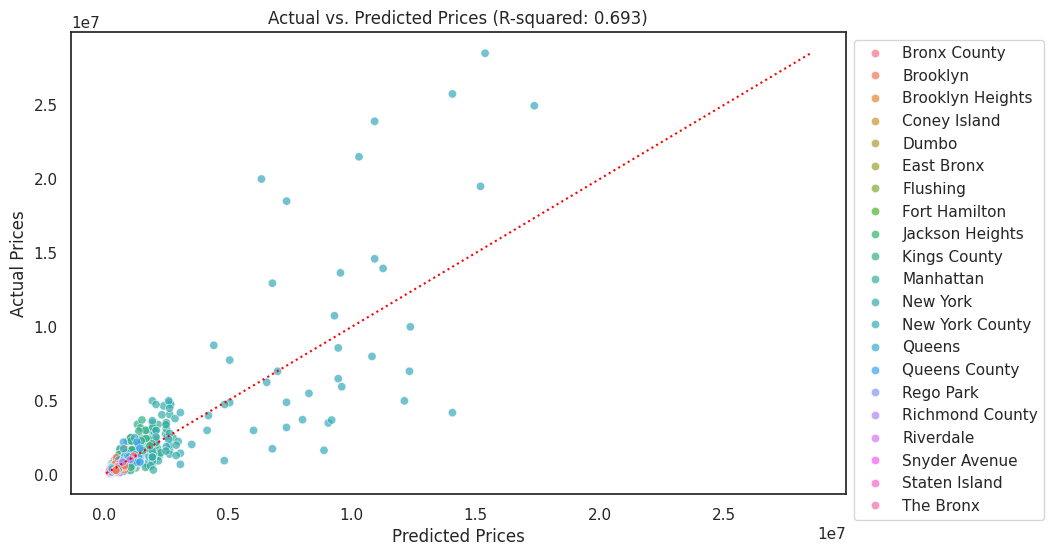

In [ ]:
plot_data = pd.DataFrame({"pred_price":pred_price,"y_test":y_test,"sublocality":X_test['sublocality']})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data = plot_data, x="pred_price", y="y_test",hue = "sublocality", alpha=0.7)
plt.title(f'Actual vs. Predicted Prices (R-squared: {r_squared:.3f})')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle=":")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

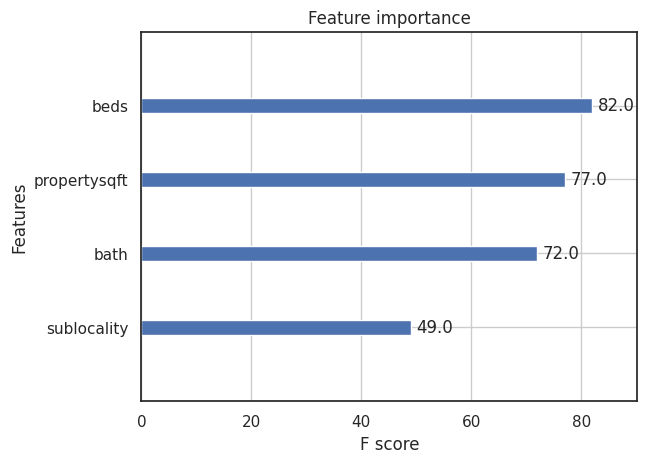

In [ ]:
xgb.plot_importance(xg_model)
plt.show()

In [ ]:
# xgb.plot_tree(xg_model, num_trees = 12, rankdir="LR")
# plt.show()

## Experimenting with other models
Using the above, let's find other models that might fit well. Scott only uses the xgboost regressor. Let's see if we can't tune a model that has better metrics

In [ ]:
# First, store results
# mse = mean_squared_error(y_test, pred_price)
# rmse = np.sqrt(mse)
# r_squared = r2_score(y_test, pred_price)
model_performances = pd.DataFrame({'model':['original xgboost'],
                                   'mse':[mse],
                                   'rmse':[rmse],
                                   'r_squared':[r_squared]})
model_performances

,model,mse,rmse,r_squared
0,original xgboost,2.032649e+12,1.425710e+06,0.692655


One way we can compare is to use the baseline models. Here we try:
- CatBoostRegressor
- RandomForestRegressor
- XGBoost with different hyperparameters

In [ ]:
%pip install catboost

In [ ]:
from catboost import CatBoostRegressor

tree_counts = np.arange(5, 26, 1)

estimator_r2_catboost = {}
for tree_count in tree_counts:
    catboost_cl = CatBoostRegressor(iterations=tree_count,  # Equivalent to number of trees
                                     random_seed=123,
                                     verbose=0,
                                     cat_features = ['sublocality'])
    catboost_cl.fit(X_train, y_train)
    pred_price = catboost_cl.predict(X_test)
    mse = mean_squared_error(y_test, pred_price)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, pred_price)
    estimator_r2_catboost[tree_count] = [mse, rmse, r_squared]

estimator_df_catboost = pd.DataFrame.from_dict(estimator_r2_catboost, orient='index',
                                               columns=["MSE", "RMSE", "R-squared"])
estimator_df_catboost


,MSE,RMSE,R-squared
5,2.459079e+12,1.568145e+06,0.628177
6,2.415786e+12,1.554280e+06,0.634723
7,2.412392e+12,1.553188e+06,0.635237
8,2.429033e+12,1.558535e+06,0.632720
9,2.430309e+12,1.558945e+06,0.632528
10,2.425897e+12,1.557529e+06,0.633195
11,2.374179e+12,1.540837e+06,0.641015
12,2.373050e+12,1.540471e+06,0.641185
13,2.354505e+12,1.534440e+06,0.643989
14,2.290405e+12,1.513408e+06,0.653682


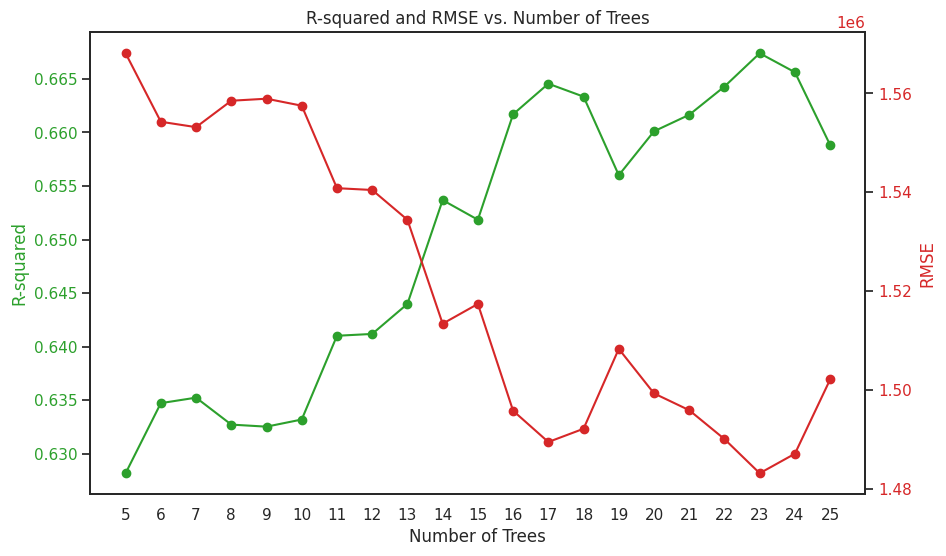

In [ ]:
fix, ax1 = plt.subplots(figsize = (10,6))
sns.set(style='white')

ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('R-squared', color="tab:green")
ax1.plot(estimator_df_catboost.index, estimator_df_catboost['R-squared'], color='tab:green')
ax1.scatter(estimator_df_catboost.index, estimator_df_catboost['R-squared'], color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Secondary y-axis for RMSE
ax2 = ax1.twinx()
ax2.set_ylabel('RMSE', color='tab:red')
ax2.plot(estimator_df_catboost.index, estimator_df_catboost['RMSE'], color='tab:red')
ax2.scatter(estimator_df_catboost.index, estimator_df_catboost['RMSE'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.xticks(ticks=[i for i in range(5,26,1)])

plt.title('R-squared and RMSE vs. Number of Trees')
plt.show()

The best parameters appear to be 17 number of trees. It could possibly be 23, but this seems more safe.

In [ ]:
# Here, we tried to make the parameter search equivalent to XGBoost since CatBoost's parameter choices are comparable

params_grid = {'depth':[3,5,8],
              "learning_rate":[0.3,0.4, 0.5],
              'boosting_type': ['Ordered', 'Plain'],
              'l2_leaf_reg': [10, 50, 100]}

cat_grid = CatBoostRegressor(iterations=13,  # Equivalent to number of trees
                           random_seed=123,
                           cat_features = ['sublocality'],
                           objective='RMSE',
                           verbose=0)

grid_search = GridSearchCV(cat_grid,
                           params_grid,
                           cv = 3,
                           scoring = "neg_mean_squared_error",
                           verbose = 1)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

cat_model = grid_search.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters:  {'boosting_type': 'Plain', 'depth': 8, 'l2_leaf_reg': 10, 'learning_rate': 0.4}
Best Negative Mean Squared Error:  -2022710253100.6926


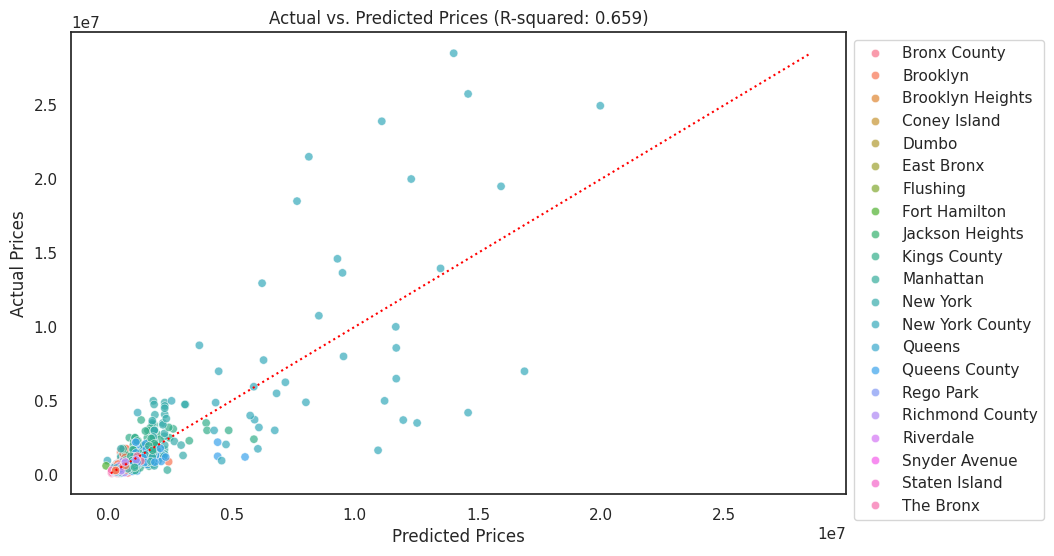

In [ ]:
plot_data = pd.DataFrame({"pred_price":pred_price,"y_test":y_test,"sublocality":X_test['sublocality']})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data = plot_data, x="pred_price", y="y_test",hue = "sublocality", alpha=0.7)
plt.title(f'Actual vs. Predicted Prices (R-squared: {r_squared:.3f})')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle=":")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# Evaluation
pred_price = cat_model.predict(X_test)
mse = mean_squared_error(y_test, pred_price)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, pred_price)

print(f"Using these parameters, we recieve: \n\n MSE = {mse:.2f} \n RMSE = {rmse:.2f}\n r-squared = {r_squared:.3f}")

Using these parameters, we recieve: 

 MSE = 2313753781978.64 
 RMSE = 1521102.82
 r-squared = 0.650


### CatBoost

In [ ]:
model_performances = pd.concat([model_performances,
           pd.DataFrame({'model':['catboost'],
                                   'mse':[mse],
                                   'rmse':[rmse],
                                   'r_squared':[r_squared]})])
model_performances

,model,mse,rmse,r_squared
0,original xgboost,2.032649e+12,1.425710e+06,0.692655
0,catboost,2.313754e+12,1.521103e+06,0.650151


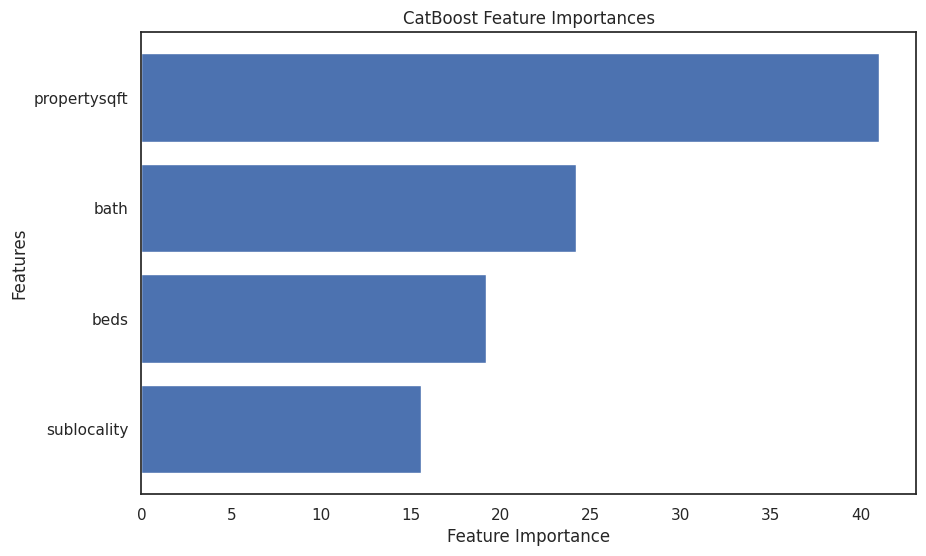

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance = cat_model.get_feature_importance(type='FeatureImportance')
feature_names = X_train.columns
sorted_idx = feature_importance.argsort()

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importances')
plt.show()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3392 entries, 3553 to 386
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   beds          3392 non-null   int64   
 1   bath          3392 non-null   float64 
 2   propertysqft  3392 non-null   float64 
 3   sublocality   3392 non-null   category
dtypes: category(1), float64(2), int64(1)
memory usage: 110.0 KB


Note: we have to onehot encode the variables for randomforest since sklearn only takes numeric inputs. We must take this into account as this may make give unfairness in the results compared to xgboost and catboost.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['sublocality']

# Apply one-hot encoding to categorical features
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])

# Drop the original categorical features from the dataset
X_train_numeric = X_train.drop(columns=categorical_features)
X_test_numeric = X_test.drop(columns=categorical_features)

# Concatenate the encoded features with the numerical features
X_train_processed = np.concatenate([X_train_numeric, X_train_encoded], axis=1)
X_test_processed = np.concatenate([X_test_numeric, X_test_encoded], axis=1)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

tree_counts = np.arange(10, 201, 10)

estimator_r2_rf = {}
for tree_count in tree_counts:
    rf_cl = RandomForestRegressor(n_estimators=tree_count,  # Equivalent to number of trees
                                     random_state=123)
    rf_cl.fit(X_train_processed, y_train)
    pred_price = rf_cl.predict(X_test_processed)
    mse = mean_squared_error(y_test, pred_price)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, pred_price)
    estimator_r2_rf[tree_count] = [mse, rmse, r_squared]

estimator_df_rf = pd.DataFrame.from_dict(estimator_r2_rf, orient='index',
                                               columns=["MSE", "RMSE", "R-squared"])
estimator_df_rf

,MSE,RMSE,R-squared
10,1.980197e+12,1.407195e+06,0.700586
20,1.763931e+12,1.328131e+06,0.733286
30,1.843994e+12,1.357937e+06,0.721181
40,1.884064e+12,1.372612e+06,0.715122
50,1.886630e+12,1.373547e+06,0.714734
60,1.851494e+12,1.360696e+06,0.720047
70,1.854058e+12,1.361638e+06,0.719659
80,1.855866e+12,1.362302e+06,0.719386
90,1.823959e+12,1.350540e+06,0.724210
100,1.819429e+12,1.348862e+06,0.724895


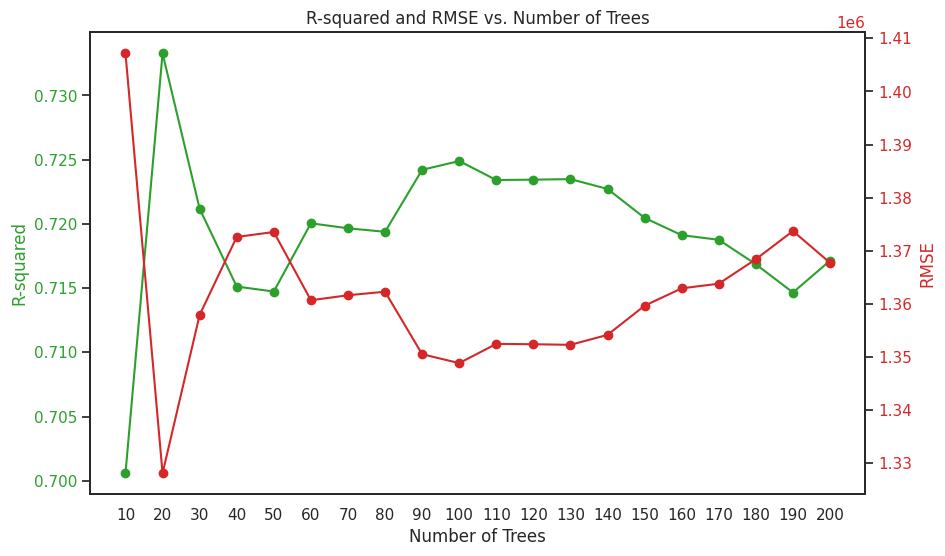

In [ ]:
fix, ax1 = plt.subplots(figsize = (10,6))
sns.set(style='white')

ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('R-squared', color="tab:green")
ax1.plot(estimator_df_rf.index, estimator_df_rf['R-squared'], color='tab:green')
ax1.scatter(estimator_df_rf.index, estimator_df_rf['R-squared'], color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Secondary y-axis for RMSE
ax2 = ax1.twinx()
ax2.set_ylabel('RMSE', color='tab:red')
ax2.plot(estimator_df_rf.index, estimator_df_rf['RMSE'], color='tab:red')
ax2.scatter(estimator_df_rf.index, estimator_df_rf['RMSE'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.xticks(ticks=[i for i in range(10, 201, 10)])

plt.title('R-squared and RMSE vs. Number of Trees')
plt.show()

The safe choice for number of estimators appears to be 100.

In [ ]:
# Here, we tried to make the parameter search equivalent to XGBoost since CatBoost's parameter choices are comparable

params_grid = {'min_samples_split':np.arange(2,20,2),
               'min_samples_leaf':np.arange(1,20,2),
               'max_features':[0.5,1,'sqrt','log2',None]}

rf_grid = RandomForestRegressor(n_estimators=100,  # Equivalent to number of trees
                           random_state=123,
                           verbose=0)

grid_search = GridSearchCV(rf_grid,
                           params_grid,
                           cv = 3,
                           scoring = "neg_mean_squared_error",
                           verbose = 1)

grid_search.fit(X_train_processed, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 450 candidates, totalling 1350 fits
Best Parameters:  {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Negative Mean Squared Error:  -1837690940174.3328


### Randomforest

In [ ]:
# Evaluation
pred_price = rf_model.predict(X_test_processed)
mse = mean_squared_error(y_test, pred_price)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, pred_price)

print(f"Using these parameters, we recieve: \n\n MSE = {mse:.2f} \n RMSE = {rmse:.2f}\n r-squared = {r_squared:.3f}")

Using these parameters, we recieve: 

 MSE = 1992285200137.32 
 RMSE = 1411483.33
 r-squared = 0.699


In [ ]:
model_performances = pd.concat([model_performances,
           pd.DataFrame({'model':['randomforest'],
                                   'mse':[mse],
                                   'rmse':[rmse],
                                   'r_squared':[r_squared]})])
model_performances

,model,mse,rmse,r_squared
0,original xgboost,2.032649e+12,1.425710e+06,0.692655
0,catboost,2.313754e+12,1.521103e+06,0.650151
0,randomforest,1.992285e+12,1.411483e+06,0.698758


In [ ]:
def plot_features(columns, importances):
    df = (pd.DataFrame({'features':columns,'feature_importances':importances})
          .sort_values('feature_importances',ascending = False)
          .reset_index(drop = True))

    fig, ax = plt.subplots()
    ax.barh(df['features'],df['feature_importances'])
    ax.set_ylabel('features')
    ax.set_xlabel('feature importances')

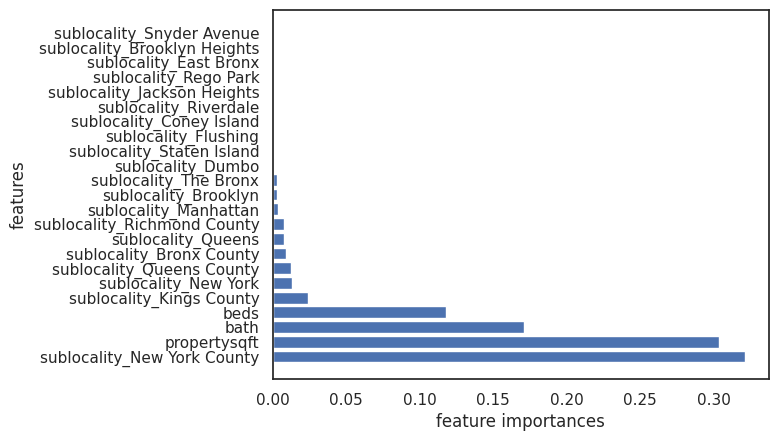

In [ ]:
# Get the column names for the one-hot encoded features
encoded_feature_names = ohe.get_feature_names_out(input_features=X_train[categorical_features].columns)

# Create a DataFrame from the processed array
X_train_processed_df = pd.DataFrame(X_train_processed, columns=np.concatenate([X_train_numeric.columns, encoded_feature_names]))

plot_features(X_train_processed_df.columns,rf_model.feature_importances_)

### XGBRegressor using the onehot encoded categorical values

In [ ]:
params_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}

xg_grid = xgb.XGBRegressor(objective = "reg:squarederror",
                           booster = 'dart',
                           n_estimators = 13,
                           seed = 123,
                           enable_categorical=True)

grid_search = GridSearchCV(xg_grid,
                           params_grid,
                           cv = 3,
                           scoring = "neg_mean_squared_error",
                           verbose = 1)

grid_search.fit(X_train_processed_df, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

xg_model2 = grid_search.best_estimator_

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
Best Parameters:  {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}
Best Negative Mean Squared Error:  -1946471109663.903


In [ ]:
# Evaluation
pred_price = xg_model2.predict(X_test_processed)
mse = mean_squared_error(y_test, pred_price)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, pred_price)

print(f"Using these parameters, we recieve: \n\n MSE = {mse:.2f} \n RMSE = {rmse:.2f}\n r-squared = {r_squared:.3f}")

Using these parameters, we recieve: 

 MSE = 2078771157553.92 
 RMSE = 1441794.42
 r-squared = 0.686


In [ ]:
model_performances = pd.concat([model_performances,
           pd.DataFrame({'model':['original xgboost w/one_hot_encoding'],
                                   'mse':[mse],
                                   'rmse':[rmse],
                                   'r_squared':[r_squared]})])
model_performances

,model,mse,rmse,r_squared
0,original xgboost,2.032649e+12,1.425710e+06,0.692655
0,catboost,2.313754e+12,1.521103e+06,0.650151
0,randomforest,1.992285e+12,1.411483e+06,0.698758
0,original xgboost w/one_hot_encoding,2.078771e+12,1.441794e+06,0.685681


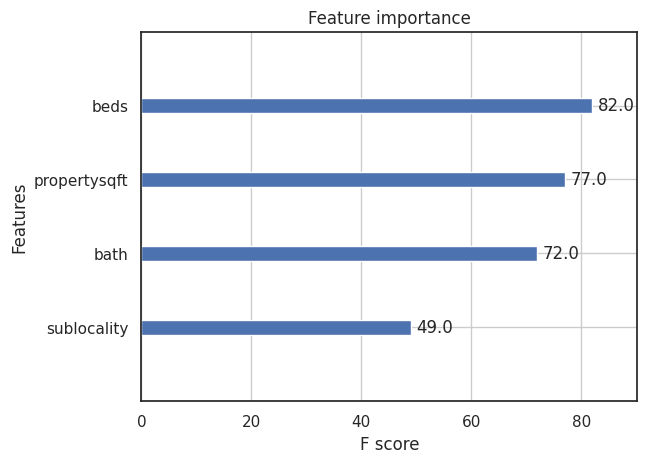

In [ ]:
xgb.plot_importance(xg_model)
plt.show()

# Keeping the Models constant but changing the preprocessing
Let's redo the preprocessing phase to see if we can get better results for the model proposed by Scott.

In [ ]:
df = pd.read_csv("NY-House-Dataset.csv")
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


### Outliers

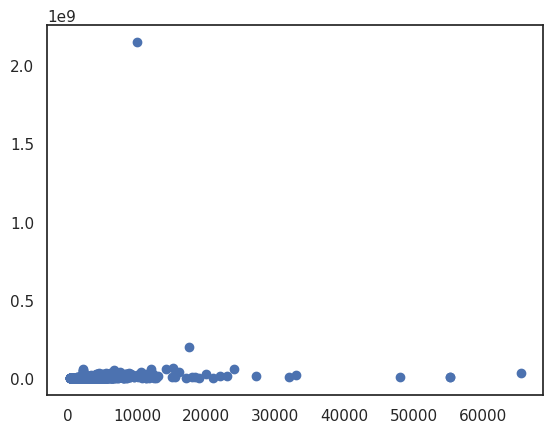

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(df['PROPERTYSQFT'],df['PRICE'])

There is a huge outlier ruining the entire shape of the data

In [ ]:
print(df.loc[df['PRICE'].idxmax()])

BROKERTITLE                              Brokered by ANNE LOPA REAL ESTATE
TYPE                                                        House for sale
PRICE                                                           2147483647
BEDS                                                                     7
BATH                                                                   6.0
PROPERTYSQFT                                                       10000.0
ADDRESS                                                 6659-6675 Amboy Rd
STATE                                                   New York, NY 10309
MAIN_ADDRESS                          6659-6675 Amboy RdNew York, NY 10309
ADMINISTRATIVE_AREA_LEVEL_2                                  United States
LOCALITY                                                          New York
SUBLOCALITY                                                Richmond County
STREET_NAME                                                  Staten Island
LONG_NAME                

Locating this address on zillow shows that the actual price of the house is actually $2,595,000. Someone increased the magnitude a thousandfold while
recording the data!

In [ ]:
df.at[304,'PRICE'] = 2595000
df.iloc[304]['PRICE']

2595000

The price has now been changed

In [ ]:
print(df.loc[df['PRICE'].idxmax()])

BROKERTITLE                                                  Brokered by Serhant
TYPE                                                              Condo for sale
PRICE                                                                  195000000
BEDS                                                                           7
BATH                                                                        10.0
PROPERTYSQFT                                                             17545.0
ADDRESS                        Central Park Tower Penthouse-217 W 57th New Yo...
STATE                                                         New York, NY 10019
MAIN_ADDRESS                   Central Park Tower Penthouse-217 W 57th New Yo...
ADMINISTRATIVE_AREA_LEVEL_2                                        United States
LOCALITY                                                                New York
SUBLOCALITY                                                      New York County
STREET_NAME                 

Looking up this property on zillow, the value might be correct, but it does not represent an actual portion of the population.

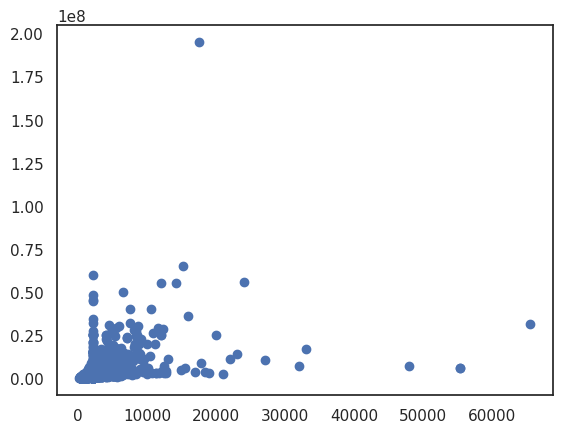

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['PROPERTYSQFT'],df['PRICE'])

As we can see, the data looks slightly better but this outlier is still causing problems, so lets just drop it

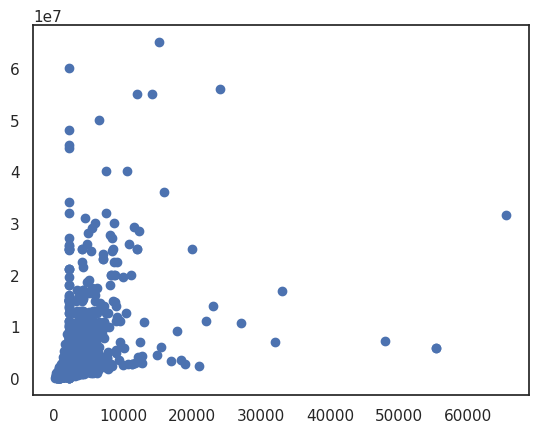

In [ ]:
df.drop([1],inplace = True)

fig, ax = plt.subplots()
ax.scatter(df['PROPERTYSQFT'],df['PRICE'])

The data looks much better, but it could still do better.

In [ ]:
df.iloc[100:120]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
101,Brokered by Top Choice Realty LLC,House for sale,899000,3,2.000000,1440.000000,40 Adelphi Ave,"Staten Island, NY 10309","40 Adelphi AveStaten Island, NY 10309",United States,New York,Richmond County,Staten Island,Adelphi Avenue,"40 Adelphi Ave, Staten Island, NY 10309, USA",40.515900,-74.231482
102,Built by Toll Brothers,For sale,2280000,2,2.000000,1400.000000,The Rockwell # 6E,"New York, NY 10025","The Rockwell # 6ENew York, NY 10025",United States,New York,New York County,New York,West 103rd Street,"218 W 103rd St, New York, NY 10025, USA",40.798658,-73.967904
103,Brokered by Cross Country Realty,Coming Soon,649000,4,3.000000,2184.207862,194 Carroll St,"Brooklyn, NY 11231","194 Carroll StBrooklyn, NY 11231",United States,New York,Kings County,Brooklyn,Carroll Street,"194 Carroll St, Brooklyn, NY 11231, USA",40.681343,-73.998151
104,Brokered by Charles Rutenberg Realty Inc,Pending,739000,6,4.000000,2184.207862,38 Dare Ct,"Brooklyn, NY 11229","38 Dare CtBrooklyn, NY 11229",United States,New York,Kings County,Brooklyn,Dare Court,"38 Dare Ct, Brooklyn, NY 11229, USA",40.587799,-73.921619
105,Brokered by AmeriHomes Realty,House for sale,1495000,4,2.373861,3000.000000,31 4th Ct,"Staten Island, NY 10312","31 4th CtStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,4 Court,"31 4 Ct, Staten Island, NY 10312, USA",40.524763,-74.168104
106,Brokered by Douglas Elliman - 187 Seventh Ave,House for sale,3950000,5,2.000000,3528.000000,591 4th St,"Brooklyn, NY 11215","591 4th StBrooklyn, NY 11215",United States,New York,Kings County,Brooklyn,4th Street,"591 4th St, Brooklyn, NY 11215, USA",40.668062,-73.974838
107,Brokered by Avenues - Headquarters,Condo for sale,325000,2,1.000000,979.000000,122 E 102nd St Apt 5B,"New York, NY 10029","122 E 102nd St Apt 5BNew York, NY 10029",New York,New York County,New York,Manhattan,122,"122 E 102nd St #5b, New York, NY 10029, USA",40.789751,-73.948726
108,Brokered by Corcoran Chelsea/Flatiron,Pending,299999,3,1.000000,2184.207862,215 W 75th St Apt 4D,"New York, NY 10023","215 W 75th St Apt 4DNew York, NY 10023",New York,New York County,New York,Manhattan,215,"215 W 75th St #4d, New York, NY 10023, USA",40.781058,-73.980841
109,Brokered by Sotheby's International Realty - E...,Townhouse for sale,2695000,6,5.000000,4720.000000,327 Convent Ave,"New York, NY 10031","327 Convent AveNew York, NY 10031",United States,New York,New York County,New York,Convent Avenue,"327 Convent Ave, New York, NY 10031, USA",40.823513,-73.946751
110,NoBroker,Pending,4800000,6,2.373861,3958.000000,1151 83rd St,"Brooklyn, NY 11228","1151 83rd StBrooklyn, NY 11228",United States,New York,Kings County,Brooklyn,83rd Street,"1151 83rd St, Brooklyn, NY 11228, USA",40.617818,-74.015117


Looking at the price column, so many of the values are the same. It seems there was some leniency in the recording of data, but considering the amount of information PropertySqft has towards the price, having at some random value seems like throwing away the information, and it might even be worse since our model will learn on bad data.

In [ ]:
df[df['PROPERTYSQFT']==2184.207862]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
12,Brokered by COMPASS,Co-op for sale,259000,3,1.0,2184.207862,34-41 85th St Unit 1D,"Jackson Heights, NY 11372","34-41 85th St Unit 1DJackson Heights, NY 11372",New York,Queens County,Queens,Flushing,34-41,"34-41 85th St #1b, Flushing, NY 11372, USA",40.753119,-73.881876
13,Brokered by Jamie & Connie Real Estate Grp,Co-op for sale,430000,2,2.0,2184.207862,91-15 Lamont Ave Unit 6D,"Elmhurst, NY 11373","91-15 Lamont Ave Unit 6DElmhurst, NY 11373",New York,Queens County,Queens,Elmhurst,91-15,"91-15 Lamont Ave #6d, Elmhurst, NY 11373, USA",40.743864,-73.874572
14,Brokered by Corcoran Chelsea/Flatiron,Co-op for sale,895000,3,1.0,2184.207862,61 Jane St Apt 6N,"New York, NY 10014","61 Jane St Apt 6NNew York, NY 10014",New York,New York County,New York,Manhattan,61,"61 Jane St #6n, New York, NY 10014, USA",40.738298,-74.005890
26,"Brokered by Nest Seekers International, Long I...",Co-op for sale,325000,1,1.0,2184.207862,35-45 81st St Unit E1,"Queens, NY 11372","35-45 81st St Unit E1Queens, NY 11372",New York,Queens County,Queens,Jackson Heights,35-45,"35-45 81st St e1, Jackson Heights, NY 11372, USA",40.750508,-73.885136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,Brokered by Corcoran East Side,Co-op for sale,370000,3,1.0,2184.207862,342 E 53rd St Apt 6C,"New York, NY 10022","342 E 53rd St Apt 6CNew York, NY 10022",New York,New York County,New York,Manhattan,342,"342 E 53rd St #6c, New York, NY 10022, USA",40.755822,-73.965514
4793,Brokered by Engel & V�������,Co-op for sale,1950000,2,4.0,2184.207862,700 Park Ave Unit 20A,"New York, NY 10021","700 Park Ave Unit 20ANew York, NY 10021",New York,New York County,New York,Manhattan,700,"700 Park Ave #20a, New York, NY 10021, USA",40.769478,-73.965389
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152


As we can see, there are 1621 rows with this price value. I believe removing them would improve our model since these wrong values represent a third of the dataframe.

In [ ]:
df.drop(df.loc[df['PROPERTYSQFT']==2184.207862].index, inplace=True)

df.shape

(3179, 17)

Considering that there are still 3179 rows of data, a model should still be able to learn.

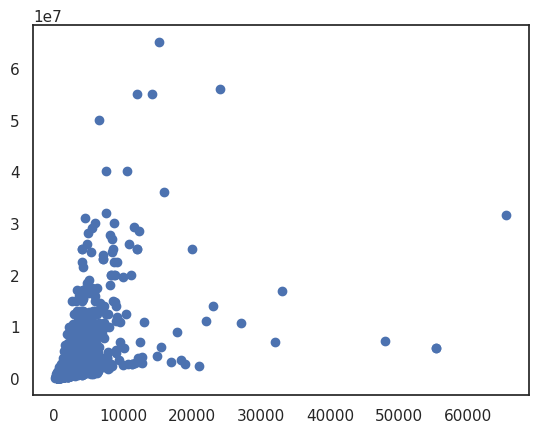

In [ ]:
fig = plt.figure()
plt.scatter(df['PROPERTYSQFT'],df['PRICE'])

In [ ]:
import re

df['zip_code'] = df['FORMATTED_ADDRESS'].apply(lambda address: int(re.findall(r"\d{5}", address)[0]))
url = 'https://github.com/erikgregorywebb/nyc-housing/blob/master/Data/nyc-zip-codes.csv?raw=true'

zip_codes = pd.read_csv(url)
zip_codes = zip_codes.rename(columns={'ZipCode':'zip_code'})

### Zip Code Extraction

In [ ]:
df = df.merge(zip_codes, on='zip_code')
df[['FORMATTED_ADDRESS', 'zip_code']].head()

,FORMATTED_ADDRESS,zip_code
0,"Regis Residence, 2 E 55th St #803, New York, N...",10022
1,"2 E 55th St, New York, NY 10022, USA",10022
2,"444 E 57th St #2d, New York, NY 10022, USA",10022
3,"231-235 E 55th St # 45a, New York, NY 10022, USA",10022
4,"411 E 53rd St #4j, New York, NY 10022, USA",10022


In [ ]:
df.head(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,zip_code,Borough,Neighborhood
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,10022,Manhattan,Gramercy Park and Murray Hill
1,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,10022,Manhattan,Gramercy Park and Murray Hill
2,Brokered by AI Realty Brokerage LLC,Condo for sale,2000000,4,4.0,3000.0,444 E 57th St Apt 2D,"New York, NY 10022","444 E 57th St Apt 2DNew York, NY 10022",New York,New York County,New York,Manhattan,444,"444 E 57th St #2d, New York, NY 10022, USA",40.757348,-73.961491,10022,Manhattan,Gramercy Park and Murray Hill


In [ ]:
df = df.drop(['ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'LONG_NAME', 'FORMATTED_ADDRESS',
             'Borough','Neighborhood','STREET_NAME'], axis=1)

df.head(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,zip_code
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,40.761255,-73.974483,10022
1,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.0,40.761398,-73.974613,10022
2,Brokered by AI Realty Brokerage LLC,Condo for sale,2000000,4,4.0,3000.0,40.757348,-73.961491,10022


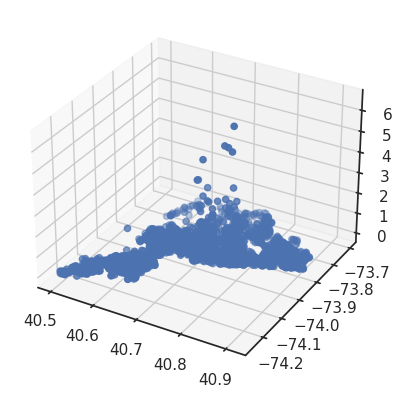

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(df['LATITUDE'],df['LONGITUDE'],df['PRICE'])

plt.show()

In [ ]:
X = df.drop('PRICE',axis =1)
y = df['PRICE']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)


In [ ]:
X_train['TYPE']

2489                Co-op for sale
1753                Co-op for sale
2123                Condo for sale
1403                Condo for sale
1077                House for sale
                   ...            
2763    Multi-family home for sale
905                 Co-op for sale
1096                       Pending
235                 Condo for sale
1061                Condo for sale
Name: TYPE, Length: 2476, dtype: object

Onehot encoding categorical variables.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['BROKERTITLE','TYPE']

# Apply one-hot encoding to categorical features
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])

# Drop the original categorical features from the dataset
X_train_numeric = X_train.drop(columns=categorical_features)
X_test_numeric = X_test.drop(columns=categorical_features)

# Concatenate the encoded features with the numerical features
X_train_processed = np.concatenate([X_train_numeric, X_train_encoded], axis=1)
X_test_processed = np.concatenate([X_test_numeric, X_test_encoded], axis=1)

# Get the column names for the one-hot encoded features
encoded_feature_names = ohe.get_feature_names_out(input_features=X_train[categorical_features].columns)

# Create a DataFrame from the processed array
X_train_processed_df = pd.DataFrame(X_train_processed, columns=np.concatenate([X_train_numeric.columns, encoded_feature_names]))


In [ ]:
X_train_processed_df.head()

,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,zip_code,BROKERTITLE_Brokered by 5 Boro Realty Corp,"BROKERTITLE_Brokered by ABC REAL ESTATE SERVICES, INC.",BROKERTITLE_Brokered by ACG REALTY NY LLC,BROKERTITLE_Brokered by AI Realty Brokerage LLC,...,TYPE_Coming Soon,TYPE_Condo for sale,TYPE_Contingent,TYPE_For sale,TYPE_Foreclosure,TYPE_House for sale,TYPE_Land for sale,TYPE_Multi-family home for sale,TYPE_Pending,TYPE_Townhouse for sale
0,3.0,1.0,250.0,40.750236,-73.970757,10017.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,863.0,40.875811,-73.876593,10467.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,4.0,2497.0,40.704623,-73.987824,11201.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.0,1602.0,40.625366,-73.908929,11234.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.0,2200.0,40.552927,-74.159159,10308.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
xg_original_best_params

{'alpha': 100, 'lambda': 10, 'learning_rate': 0.4, 'max_depth': 5}

In [ ]:
# Keep the same architecture as the original xgboost by Scott Pitcher
xg_processed_model = xgb.XGBRegressor(alpha=100,
                                      reg_lambda=10,
                                      learning_rate=.4,
                                      max_depth=5,
                                      objective = "reg:squarederror",
                                      booster = 'dart',
                                      n_estimators = 13,
                                      seed = 123,
                                      enable_categorical=True
                                      )
xg_processed_model.fit(X_train_processed_df, y_train)

XGBRegressor(alpha=100, base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=13, n_jobs=None,
             num_parallel_tree=None, ...)

### XGBoost Result

In [ ]:
# This uses the original XGBRegressor model but predicts using new X test
pred_price = xg_processed_model.predict(X_test_processed)
mse = mean_squared_error(y_test, pred_price)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, pred_price)

print(f"Using these parameters, we recieve: \n\n MSE = {mse:.2f} \n RMSE = {rmse:.2f}\n r-squared = {r_squared:.3f}")

Using these parameters, we recieve: 

 MSE = 3321167138271.28 
 RMSE = 1822406.96
 r-squared = 0.585


In [ ]:
model_performances = pd.concat([model_performances,
           pd.DataFrame({'model':['xgboost w/preprocessing'],
                                   'mse':[mse],
                                   'rmse':[rmse],
                                   'r_squared':[r_squared]})])
model_performances

,model,mse,rmse,r_squared
0,original xgboost,2.032649e+12,1.425710e+06,0.692655
0,catboost,2.313754e+12,1.521103e+06,0.650151
0,randomforest,1.992285e+12,1.411483e+06,0.698758
0,original xgboost w/one_hot_encoding,2.078771e+12,1.441794e+06,0.685681
0,xgboost w/preprocessing,3.321167e+12,1.822407e+06,0.584658


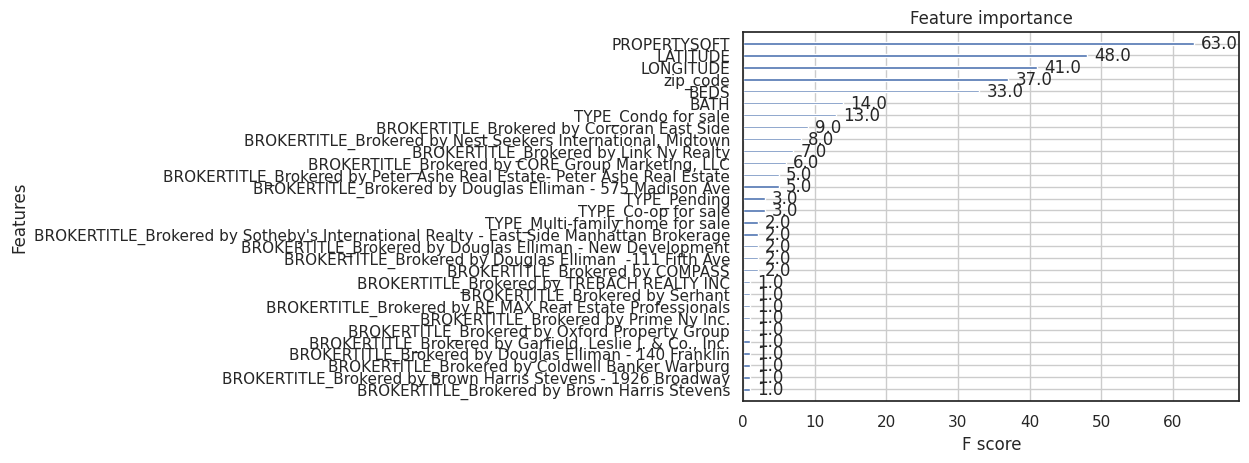

In [ ]:
xgb.plot_importance(xg_processed_model)
plt.show()

We can try one more comparison to see if doing another grid search to find optimal parameters might yield a better result. Note, however, this is different from the original xgboost model architecture used by Scott Pitcher.

In [ ]:
params_grid = {'max_depth':[3,5,8],
              "learning_rate":[0.3,0.4, 0.5],
              'lambda': [10, 50, 100],
              'alpha':[10, 50, 100]}

xg_grid = xgb.XGBRegressor(objective = "reg:squarederror",
                           booster = 'dart',
                           n_estimators = 13,
                           seed = 123,
                           enable_categorical=True)

grid_search = GridSearchCV(xg_grid,
                           params_grid,
                           cv = 3,
                           scoring = "neg_mean_squared_error",
                           verbose = 1)

grid_search.fit(X_train_processed_df, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

xg_processed_model2 = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters:  {'alpha': 10, 'lambda': 10, 'learning_rate': 0.3, 'max_depth': 5}
Best Negative Mean Squared Error:  -5954648763947.973


In [ ]:
pred_price = xg_processed_model2.predict(X_test_processed)
mse = mean_squared_error(y_test, pred_price)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, pred_price)

print(f"Using these parameters, we recieve: \n\n MSE = {mse:.2f} \n RMSE = {rmse:.2f}\n r-squared = {r_squared:.3f}")

Using these parameters, we recieve: 

 MSE = 2254890492749.87 
 RMSE = 1501629.28
 r-squared = 0.718


In [ ]:
model_performances = pd.concat([model_performances,
           pd.DataFrame({'model':['xgboost w/preprocessing & gridsearch'],
                                   'mse':[mse],
                                   'rmse':[rmse],
                                   'r_squared':[r_squared]})])
model_performances

,model,mse,rmse,r_squared
0,original xgboost,2.032649e+12,1.425710e+06,0.692655
0,catboost,2.313754e+12,1.521103e+06,0.650151
0,randomforest,1.992285e+12,1.411483e+06,0.698758
0,original xgboost w/one_hot_encoding,2.078771e+12,1.441794e+06,0.685681
0,xgboost w/preprocessing,3.321167e+12,1.822407e+06,0.584658
0,xgboost w/preprocessing & gridsearch,2.254890e+12,1.501629e+06,0.718006


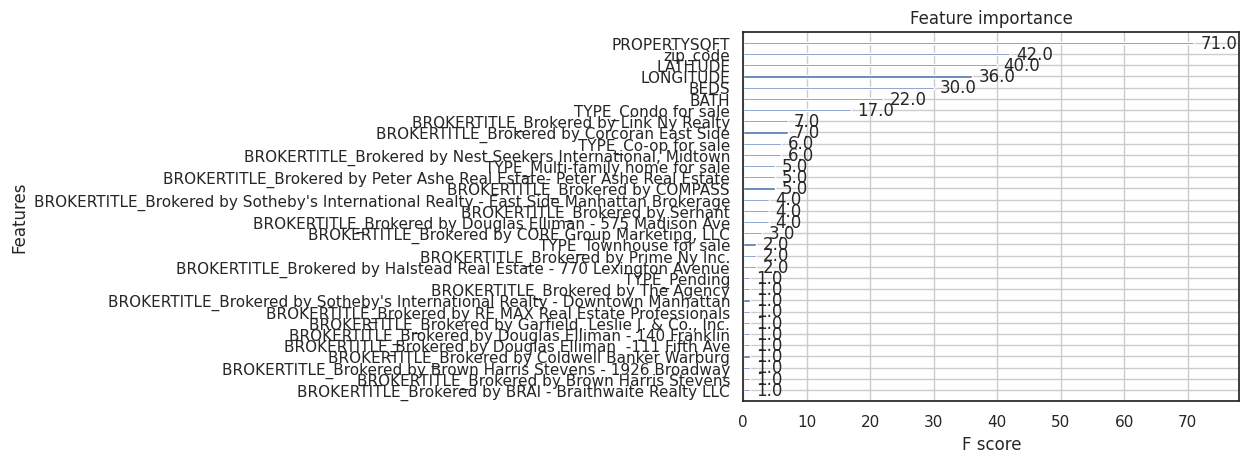

In [ ]:
xgb.plot_importance(xg_processed_model2)
plt.show()

We can also look at CatBoost to see if there's a difference as well.

In [ ]:
params_grid = {'depth':[3,5,8],
              "learning_rate":[0.3,0.4, 0.5],
              'boosting_type': ['Ordered', 'Plain'],
              'l2_leaf_reg': [10, 50, 100]}

cat_grid = CatBoostRegressor(iterations=13,  # Equivalent to number of trees
                           random_seed=123,
                           objective='RMSE',
                           verbose=0)

grid_search = GridSearchCV(cat_grid,
                           params_grid,
                           cv = 3,
                           scoring = "neg_mean_squared_error",
                           verbose = 1)

grid_search.fit(X_train_processed_df, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

cat_processed_model = grid_search.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters:  {'boosting_type': 'Ordered', 'depth': 8, 'l2_leaf_reg': 10, 'learning_rate': 0.5}
Best Negative Mean Squared Error:  -5367263545882.38


In [ ]:
pred_price = cat_processed_model.predict(X_test_processed)
mse = mean_squared_error(y_test, pred_price)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, pred_price)

print(f"Using these parameters, we recieve: \n\n MSE = {mse:.2f} \n RMSE = {rmse:.2f}\n r-squared = {r_squared:.3f}")

Using these parameters, we recieve: 

 MSE = 2353805357959.19 
 RMSE = 1534211.64
 r-squared = 0.706


### CatBoost Result

In [ ]:
model_performances = pd.concat([model_performances,
           pd.DataFrame({'model':['catboost w/preprocessing & gridsearch'],
                                   'mse':[mse],
                                   'rmse':[rmse],
                                   'r_squared':[r_squared]})])
model_performances

,model,mse,rmse,r_squared
0,original xgboost,2.032649e+12,1.425710e+06,0.692655
0,catboost,2.313754e+12,1.521103e+06,0.650151
0,randomforest,1.992285e+12,1.411483e+06,0.698758
0,original xgboost w/one_hot_encoding,2.078771e+12,1.441794e+06,0.685681
0,xgboost w/preprocessing,3.321167e+12,1.822407e+06,0.584658
0,xgboost w/preprocessing & gridsearch,2.254890e+12,1.501629e+06,0.718006
0,catboost w/preprocessing & gridsearch,2.353805e+12,1.534212e+06,0.705635


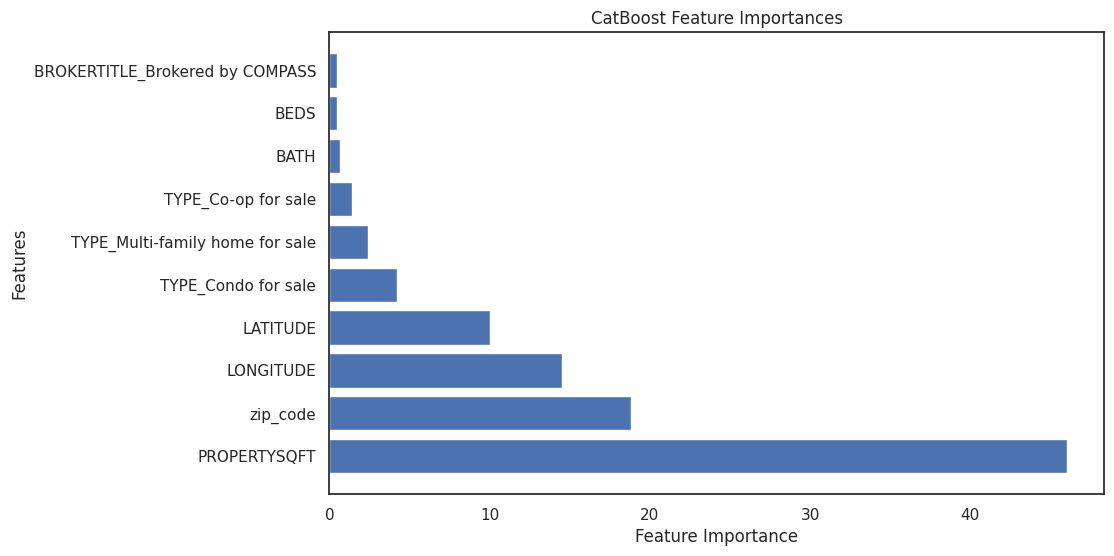

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance = cat_processed_model.get_feature_importance(type='FeatureImportance')
feature_names = X_train_processed_df.columns
sorted_idx = feature_importance.argsort()[[-i for i in range(1,11)]]

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importances')
plt.show()

In [ ]:
model_performances

,model,mse,rmse,r_squared
0,original xgboost,2.032649e+12,1.425710e+06,0.692655
0,catboost,2.313754e+12,1.521103e+06,0.650151
0,randomforest,1.992285e+12,1.411483e+06,0.698758
0,original xgboost w/one_hot_encoding,2.078771e+12,1.441794e+06,0.685681
0,xgboost w/preprocessing,3.321167e+12,1.822407e+06,0.584658
0,xgboost w/preprocessing & gridsearch,2.254890e+12,1.501629e+06,0.718006
0,catboost w/preprocessing & gridsearch,2.353805e+12,1.534212e+06,0.705635


Project video: [https://drive.google.com/file/d/1OT1zGl6UNIk5A8pKDCqJBH5Xn8dQPbIU/view?usp=drive_link](https://drive.google.com/file/d/1OT1zGl6UNIk5A8pKDCqJBH5Xn8dQPbIU/view?usp=drive_link)